# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
]\----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
#https://stackoverflow.com/questions/48908772/read-csv-with-pandas-from-subdirectory-on-windows-and-unix
from pathlib import Path
root = Path()
root

PosixPath('.')

In [3]:
project_data = pd.read_csv(root / 'train_data.csv')
resource_data = pd.read_csv(root / 'resources.csv')

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [6]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [7]:
#https://www.geeksforgeeks.org/how-to-randomly-select-rows-from-pandas-dataframe/
project_data= project_data.sample(frac =.50)
is_approved=project_data.pop('project_is_approved')
project_data.shape

(54624, 16)

In [8]:
#https://stackoverflow.com/questions/36997619/sklearn-stratified-sampling-based-on-a-column
project_data.head()

print(project_data.shape)

(54624, 16)


## Note: Working with only 50% dataset as running on full dataset for xgboost is taking over 12 hours for just BOW.

In [9]:
#https://stackoverflow.com/questions/36997619/sklearn-stratified-sampling-based-on-a-column
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( project_data, is_approved, test_size=0.30, random_state=42, stratify=is_approved)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(38236, 16)
(16388, 16)
(38236,)
(16388,)


In [11]:
#https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=42, stratify=y_train)

In [12]:
print("Train shape")
print(X_train.shape)
print(y_train.shape)
print("-"*75)
print("Test shape")
print(X_test.shape)
print(y_test.shape)
print("-"*75)
print("Cross Validation shape")
print(X_val.shape)
print(y_val.shape)

Train shape
(26765, 16)
(26765,)
---------------------------------------------------------------------------
Test shape
(16388, 16)
(16388,)
---------------------------------------------------------------------------
Cross Validation shape
(11471, 16)
(11471,)


### Conclusion: 
 - Train dataset has 26765 rows
 - Test has 16388 rows while Cross validation dataset has 11471 rows. 
 -  We have 16 features across test, train and cross validation data sets.

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

## 2.2.1 Preprocessing of Category

## 2.2.1.1 Preprocessing of Category for Train

In [13]:
catogories = list(X_train['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_train['clean_categories'] = cat_list
X_train.drop(['project_subject_categories'], axis=1, inplace=True)

## 2.2.1.2 Preprocessing of Category for Cross Validation

In [14]:
catogories = list(X_val['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_val['clean_categories'] = cat_list
X_val.drop(['project_subject_categories'], axis=1, inplace=True)

## 2.2.1.3 Preprocessing of Category for Test

In [15]:
catogories = list(X_test['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_test['clean_categories'] = cat_list
X_test.drop(['project_subject_categories'], axis=1, inplace=True)

## 2.2.1.4 preprocessing of `project_subject_subcategories` for Train

In [16]:
sub_catogories = list(X_train['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_train['clean_subcategories'] = sub_cat_list
X_train.drop(['project_subject_subcategories'], axis=1, inplace=True)

## 2.2.2.1 preprocessing of `project_subject_subcategories` for Test

In [17]:
sub_catogories = list(X_test['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_test['clean_subcategories'] = sub_cat_list
X_test.drop(['project_subject_subcategories'], axis=1, inplace=True)

## 2.1.2.1 preprocessing of `project_subject_subcategories` for Cross Validation

In [18]:
sub_catogories = list(X_val['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_val['clean_subcategories'] = sub_cat_list
X_val.drop(['project_subject_subcategories'], axis=1, inplace=True)

### 2.1.3.1 Preprocessing of Project_Grade_Category for Test, Train and Cross Validation


In [19]:
grade_catogories = list(X_train['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

grade_cat_list = []
for i in grade_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    #for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
     #   if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
      #      j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
    i = i.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
    i = i.replace('-','_')
    #print(i + " " + temp)
    temp +=i.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
       # temp = temp.replace('&','_')
    #print(temp.strip())
    grade_cat_list.append(temp.strip())
    #print(grade_cat_list)

X_train['clean_grades'] = grade_cat_list
X_train.drop(['project_grade_category'], axis=1, inplace=True)

In [20]:
grade_catogories = list(X_test['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

grade_cat_list = []
for i in grade_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    #for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
     #   if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
      #      j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
    i = i.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
    i = i.replace('-','_')
    #print(i + " " + temp)
    temp +=i.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
       # temp = temp.replace('&','_')
    #print(temp.strip())
    grade_cat_list.append(temp.strip())
    #print(grade_cat_list)

X_test['clean_grades'] = grade_cat_list
X_test.drop(['project_grade_category'], axis=1, inplace=True)

In [21]:
grade_catogories = list(X_val['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

grade_cat_list = []
for i in grade_catogories:
    temp = ""
    i = i.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
    i = i.replace('-','_')
    #print(i + " " + temp)
    temp +=i.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
       # temp = temp.replace('&','_')
    #print(temp.strip())
    grade_cat_list.append(temp.strip())
    #print(grade_cat_list)

X_val['clean_grades'] = grade_cat_list
X_val.drop(['project_grade_category'], axis=1, inplace=True)

### 2.1.3.1 Preprocessing of Essay for Test, Train and Cross Validation

In [22]:
X_train["essay"] = X_train["project_essay_1"].map(str) +\
                        X_train["project_essay_2"].map(str) + \
                        X_train["project_essay_3"].map(str) + \
                        X_train["project_essay_4"].map(str)

In [23]:
X_val["essay"] = X_val["project_essay_1"].map(str) +\
                        X_val["project_essay_2"].map(str) + \
                        X_val["project_essay_3"].map(str) + \
                        X_val["project_essay_4"].map(str)

In [24]:
X_test["essay"] = X_test["project_essay_1"].map(str) +\
                        X_test["project_essay_2"].map(str) + \
                        X_test["project_essay_3"].map(str) + \
                        X_test["project_essay_4"].map(str)

In [25]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]


In [26]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays_train.append(sent.lower().strip())

100%|██████████| 26765/26765 [00:17<00:00, 1548.04it/s]


In [27]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays_test = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays_test.append(sent.lower().strip())

100%|██████████| 16388/16388 [00:10<00:00, 1556.73it/s]


In [28]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays_val = []
# tqdm is for printing the status bar
for sentance in tqdm(X_val['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays_val.append(sent.lower().strip())

100%|██████████| 11471/11471 [00:07<00:00, 1555.68it/s]


### 2.1.3.1 Preprocessing of Title for Test, Train and Cross Validation

In [29]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_title_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['project_title'].values):
    sent = decontracted(sentance)
    #sent = sent.replace('\\r', ' ')
    #sent = sent.replace('\\"', ' ')
    #sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title_train.append(sent.lower().strip())

100%|██████████| 26765/26765 [00:00<00:00, 35097.04it/s]


In [30]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_title_test = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['project_title'].values):
    sent = decontracted(sentance)
    #sent = sent.replace('\\r', ' ')
    #sent = sent.replace('\\"', ' ')
    #sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title_test.append(sent.lower().strip())

100%|██████████| 16388/16388 [00:00<00:00, 34799.13it/s]


In [31]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_title_val = []
# tqdm is for printing the status bar
for sentance in tqdm(X_val['project_title'].values):
    sent = decontracted(sentance)
    #sent = sent.replace('\\r', ' ')
    #sent = sent.replace('\\"', ' ')
    #sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title_val.append(sent.lower().strip())

100%|██████████| 11471/11471 [00:00<00:00, 34886.23it/s]


## 2.2 Response Coding
<img src='response.JPG' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

### 2.2.3 Response Coding of Categogiral Values for Test, Train and Cross Validation

### 2.2.3.1 Response Coding of Category for Test, Train and Cross Validation

In [32]:
#https://cmdlinetips.com/2018/01/how-to-get-unique-values-from-a-column-in-pandas-data-frame/
#https://stackoverflow.com/questions/20461165/how-to-convert-index-of-a-pandas-dataframe-into-a-column
#https://stackoverflow.com/questions/16617394/select-rows-by-partial-string-match-in-index
pos_value=X_train[y_train==1]['clean_categories'].value_counts().to_dict()
neg_value=X_train[y_train==0]['clean_categories'].value_counts().to_dict()
total_value=X_train['clean_categories'].value_counts().to_dict()
final_pos_value={}

for pos,val in pos_value.items():
    final_pos_value[pos]= val/total_value[pos]

final_neg_value={}
for neg,val in neg_value.items():
    final_neg_value[neg]= val/total_value[neg]

In [33]:
#https://stackoverflow.com/questions/26657378/how-to-modify-a-value-in-one-cell-of-a-pandas-data-frame
#https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index
#https://stackoverflow.com/questions/48709404/initialize-empty-pandas-series-and-conditionally-add-to-it?rq=1
for idx,val in tqdm(y_train.iteritems()):
    cat=X_train.loc[idx,:]['clean_categories']
    if pd.isna(cat):
        X_train.at[idx,'clean_categories_1'] = 0.5
        X_train.at[idx,'clean_categories_0'] = 0.5
    else:
        if (cat in final_pos_value) and (cat in final_neg_value):
            X_train.at[idx,'clean_categories_1'] = final_pos_value[cat]
            X_train.at[idx,'clean_categories_0'] = final_neg_value[cat]
        elif (cat in final_pos_value) and (cat not in final_neg_value):
            X_train.at[idx,'clean_categories_1'] = final_pos_value[cat]
            X_train.at[idx,'clean_categories_0'] = 0
        elif (cat not in final_pos_value) and (cat in final_neg_value):
            X_train.at[idx,'clean_categories_1'] = 0
            X_train.at[idx,'clean_categories_0'] = final_neg_value[cat]

26765it [00:08, 3042.11it/s]


In [34]:
response_encoding_cat_train=X_train[['clean_categories_1','clean_categories_0']]
response_encoding_cat_train.shape

(26765, 2)

In [35]:
#response_encoding_cat_train.head(10)

In [36]:
#https://stackoverflow.com/questions/26657378/how-to-modify-a-value-in-one-cell-of-a-pandas-data-frame
#https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index
#https://stackoverflow.com/questions/48709404/initialize-empty-pandas-series-and-conditionally-add-to-it?rq=1
for idx,v in tqdm(y_val.iteritems()):
    #print(idx)
    cat=X_val.loc[idx,:]['clean_categories']
    if pd.isna(cat) or ((cat not in final_pos_value) and (cat not in final_neg_value)):
        X_val.at[idx,'clean_categories_1'] = 0.5
        X_val.at[idx,'clean_categories_0'] = 0.5
    else:
        if (cat in final_pos_value) and (cat in final_neg_value):
            X_val.at[idx,'clean_categories_1'] = final_pos_value[cat]
            X_val.at[idx,'clean_categories_0'] = final_neg_value[cat]
        elif (cat in final_pos_value) and (cat not in final_neg_value):
            X_val.at[idx,'clean_categories_1'] = final_pos_value[cat]
            X_val.at[idx,'clean_categories_0'] = 0
        elif (cat not in final_pos_value) and (cat in final_neg_value):
            X_val.at[idx,'clean_categories_1'] = 0
            X_val.at[idx,'clean_categories_0'] = final_neg_value[cat]

11471it [00:03, 3045.50it/s]


In [37]:
response_encoding_cat_val=X_val[['clean_categories_1','clean_categories_0']]
response_encoding_cat_val.shape

(11471, 2)

In [38]:
#https://stackoverflow.com/questions/26657378/how-to-modify-a-testue-in-one-cell-of-a-pandas-data-frame
#https://stackoverflow.com/questions/13842088/set-testue-for-particular-cell-in-pandas-dataframe-using-index
#https://stackoverflow.com/questions/48709404/initialize-empty-pandas-series-and-conditionally-add-to-it?rq=1
for idx,v in tqdm(y_test.iteritems()):
    #print(idx)
    cat=X_test.loc[idx,:]['clean_categories']
    if pd.isna(cat) or ((cat not in final_pos_value) and (cat not in final_neg_value)):
        X_test.at[idx,'clean_categories_1'] = 0.5
        X_test.at[idx,'clean_categories_0'] = 0.5
    else:
        if (cat in final_pos_value) and (cat in final_neg_value):
            X_test.at[idx,'clean_categories_1'] = final_pos_value[cat]
            X_test.at[idx,'clean_categories_0'] = final_neg_value[cat]
        elif (cat in final_pos_value) and (cat not in final_neg_value):
            X_test.at[idx,'clean_categories_1'] = final_pos_value[cat]
            X_test.at[idx,'clean_categories_0'] = 0
        elif (cat not in final_pos_value) and (cat in final_neg_value):
            X_test.at[idx,'clean_categories_1'] = 0
            X_test.at[idx,'clean_categories_0'] = final_neg_value[cat]

16388it [00:05, 3030.09it/s]


In [39]:
response_encoding_cat_test=X_test[['clean_categories_1','clean_categories_0']]
response_encoding_cat_test.shape

(16388, 2)

### 2.2.3.2 Response Coding of Sub-Category for Test, Train and Cross Validation

In [40]:
#X_train.head(2)

In [41]:
#https://cmdlinetips.com/2018/01/how-to-get-unique-values-from-a-column-in-pandas-data-frame/
#https://stackoverflow.com/questions/20461165/how-to-convert-index-of-a-pandas-dataframe-into-a-column
#https://stackoverflow.com/questions/16617394/select-rows-by-partial-string-match-in-index
pos_value=X_train[y_train==1]['clean_subcategories'].value_counts().to_dict()
neg_value=X_train[y_train==0]['clean_subcategories'].value_counts().to_dict()
total_value=X_train['clean_subcategories'].value_counts().to_dict()
final_pos_value={}

for pos,val in pos_value.items():
    final_pos_value[pos]= val/total_value[pos]

final_neg_value={}
for neg,val in neg_value.items():
    final_neg_value[neg]= val/total_value[neg]

In [42]:
#https://stackoverflow.com/questions/26657378/how-to-modify-a-value-in-one-cell-of-a-pandas-data-frame
#https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index
#https://stackoverflow.com/questions/48709404/initialize-empty-pandas-series-and-conditionally-add-to-it?rq=1
for idx,val in tqdm(y_train.iteritems()):
    cat=X_train.loc[idx,:]['clean_subcategories']
    if pd.isna(cat):
        X_train.at[idx,'clean_subcategories_1'] = 0.5
        X_train.at[idx,'clean_subcategories_0'] = 0.5
    else:
        if (cat in final_pos_value) and (cat in final_neg_value):
            X_train.at[idx,'clean_subcategories_1'] = final_pos_value[cat]
            X_train.at[idx,'clean_subcategories_0'] = final_neg_value[cat]
        elif (cat in final_pos_value) and (cat not in final_neg_value):
            X_train.at[idx,'clean_subcategories_1'] = final_pos_value[cat]
            X_train.at[idx,'clean_subcategories_0'] = 0
        elif (cat not in final_pos_value) and (cat in final_neg_value):
            X_train.at[idx,'clean_subcategories_1'] = 0
            X_train.at[idx,'clean_subcategories_0'] = final_neg_value[cat]

26765it [00:08, 3042.64it/s]


In [43]:
#https://stackoverflow.com/questions/26657378/how-to-modify-a-value-in-one-cell-of-a-pandas-data-frame
#https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index
#https://stackoverflow.com/questions/48709404/initialize-empty-pandas-series-and-conditionally-add-to-it?rq=1
for idx,v in tqdm(y_val.iteritems()):
    #print(idx)
    cat=X_val.loc[idx,:]['clean_subcategories']
    if pd.isna(cat) or ((cat not in final_pos_value) and (cat not in final_neg_value)):
        X_val.at[idx,'clean_subcategories_1'] = 0.5
        X_val.at[idx,'clean_subcategories_0'] = 0.5
    else:
        if (cat in final_pos_value) and (cat in final_neg_value):
            X_val.at[idx,'clean_subcategories_1'] = final_pos_value[cat]
            X_val.at[idx,'clean_subcategories_0'] = final_neg_value[cat]
        elif (cat in final_pos_value) and (cat not in final_neg_value):
            X_val.at[idx,'clean_subcategories_1'] = final_pos_value[cat]
            X_val.at[idx,'clean_subcategories_0'] = 0
        elif (cat not in final_pos_value) and (cat in final_neg_value):
            X_val.at[idx,'clean_subcategories_1'] = 0
            X_val.at[idx,'clean_subcategories_0'] = final_neg_value[cat]

11471it [00:03, 3032.39it/s]


In [44]:
#https://stackoverflow.com/questions/26657378/how-to-modify-a-testue-in-one-cell-of-a-pandas-data-frame
#https://stackoverflow.com/questions/13842088/set-testue-for-particular-cell-in-pandas-dataframe-using-index
#https://stackoverflow.com/questions/48709404/initialize-empty-pandas-series-and-conditionally-add-to-it?rq=1
for idx,v in tqdm(y_test.iteritems()):
    #print(idx)
    cat=X_test.loc[idx,:]['clean_subcategories']
    if pd.isna(cat) or ((cat not in final_pos_value) and (cat not in final_neg_value)):
        X_test.at[idx,'clean_subcategories_1'] = 0.5
        X_test.at[idx,'clean_subcategories_0'] = 0.5
    else:
        if (cat in final_pos_value) and (cat in final_neg_value):
            X_test.at[idx,'clean_subcategories_1'] = final_pos_value[cat]
            X_test.at[idx,'clean_subcategories_0'] = final_neg_value[cat]
        elif (cat in final_pos_value) and (cat not in final_neg_value):
            X_test.at[idx,'clean_subcategories_1'] = final_pos_value[cat]
            X_test.at[idx,'clean_subcategories_0'] = 0
        elif (cat not in final_pos_value) and (cat in final_neg_value):
            X_test.at[idx,'clean_subcategories_1'] = 0
            X_test.at[idx,'clean_subcategories_0'] = final_neg_value[cat]

16388it [00:05, 2928.18it/s]


In [45]:
response_encoding_subcat_test=X_test[['clean_subcategories_1','clean_subcategories_0']]
response_encoding_subcat_val=X_val[['clean_subcategories_1','clean_subcategories_0']]
response_encoding_subcat_train=X_train[['clean_subcategories_1','clean_subcategories_0']]
#response_encoding_subcat_train

### 2.2.3.3 Response Coding of Teacher for Test, Train and Cross Validation

In [46]:
#https://cmdlinetips.com/2018/01/how-to-get-unique-values-from-a-column-in-pandas-data-frame/
#https://stackoverflow.com/questions/20461165/how-to-convert-index-of-a-pandas-dataframe-into-a-column
#https://stackoverflow.com/questions/16617394/select-rows-by-partial-string-match-in-index
pos_value=X_train[y_train==1]['teacher_prefix'].value_counts().to_dict()
neg_value=X_train[y_train==0]['teacher_prefix'].value_counts().to_dict()
total_value=X_train['teacher_prefix'].value_counts().to_dict()
final_pos_value={}

for pos,val in pos_value.items():
    final_pos_value[pos]= val/total_value[pos]

final_neg_value={}
for neg,val in neg_value.items():
    final_neg_value[neg]= val/total_value[neg]

In [47]:
print(final_pos_value)
print(final_neg_value)

{'Mrs.': 0.8573462414578588, 'Ms.': 0.8403716216216216, 'Teacher': 0.7996768982229402, 'Mr.': 0.841723874904653, 'Dr.': 0.75}
{'Mrs.': 0.14265375854214124, 'Ms.': 0.15962837837837837, 'Teacher': 0.20032310177705978, 'Mr.': 0.15827612509534705, 'Dr.': 0.25}


In [48]:
#https://stackoverflow.com/questions/26657378/how-to-modify-a-value-in-one-cell-of-a-pandas-data-frame
#https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index
#https://stackoverflow.com/questions/48709404/initialize-empty-pandas-series-and-conditionally-add-to-it?rq=1
for idx,val in tqdm(y_train.iteritems()):
    cat=X_train.loc[idx,:]['teacher_prefix']
    if pd.isna(cat):
        X_train.at[idx,'teacher_prefix_1'] = 0.5
        X_train.at[idx,'teacher_prefix_0'] = 0.5
    else:
        if (cat in final_pos_value) and (cat in final_neg_value):
            X_train.at[idx,'teacher_prefix_1'] = final_pos_value[cat]
            X_train.at[idx,'teacher_prefix_0'] = final_neg_value[cat]
        elif (cat in final_pos_value) and (cat not in final_neg_value):
            X_train.at[idx,'teacher_prefix_1'] = final_pos_value[cat]
            X_train.at[idx,'teacher_prefix_0'] = 0
        elif (cat not in final_pos_value) and (cat in final_neg_value):
            X_train.at[idx,'teacher_prefix_1'] = 0
            X_train.at[idx,'teacher_prefix_0'] = final_neg_value[cat]

26765it [00:08, 3038.55it/s]


In [49]:
#https://stackoverflow.com/questions/26657378/how-to-modify-a-value-in-one-cell-of-a-pandas-data-frame
#https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index
#https://stackoverflow.com/questions/48709404/initialize-empty-pandas-series-and-conditionally-add-to-it?rq=1
for idx,v in tqdm(y_val.iteritems()):
    #print(idx)
    cat=X_val.loc[idx,:]['teacher_prefix']
    if pd.isna(cat) or ((cat not in final_pos_value) and (cat not in final_neg_value)):
        X_val.at[idx,'teacher_prefix_1'] = 0.5
        X_val.at[idx,'teacher_prefix_0'] = 0.5
    else:
        if (cat in final_pos_value) and (cat in final_neg_value):
            X_val.at[idx,'teacher_prefix_1'] = final_pos_value[cat]
            X_val.at[idx,'teacher_prefix_0'] = final_neg_value[cat]
        elif (cat in final_pos_value) and (cat not in final_neg_value):
            X_val.at[idx,'teacher_prefix_1'] = final_pos_value[cat]
            X_val.at[idx,'teacher_prefix_0'] = 0
        elif (cat not in final_pos_value) and (cat in final_neg_value):
            X_val.at[idx,'teacher_prefix_1'] = 0
            X_val.at[idx,'teacher_prefix_0'] = final_neg_value[cat]

11471it [00:03, 3042.15it/s]


In [50]:
#https://stackoverflow.com/questions/26657378/how-to-modify-a-testue-in-one-cell-of-a-pandas-data-frame
#https://stackoverflow.com/questions/13842088/set-testue-for-particular-cell-in-pandas-dataframe-using-index
#https://stackoverflow.com/questions/48709404/initialize-empty-pandas-series-and-conditionally-add-to-it?rq=1
for idx,v in tqdm(y_test.iteritems()):
    #print(idx)
    cat=X_test.loc[idx,:]['teacher_prefix']
    if pd.isna(cat) or ((cat not in final_pos_value) and (cat not in final_neg_value)):
        X_test.at[idx,'teacher_prefix_1'] = 0.5
        X_test.at[idx,'teacher_prefix_0'] = 0.5
    else:
        if (cat in final_pos_value) and (cat in final_neg_value):
            X_test.at[idx,'teacher_prefix_1'] = final_pos_value[cat]
            X_test.at[idx,'teacher_prefix_0'] = final_neg_value[cat]
        elif (cat in final_pos_value) and (cat not in final_neg_value):
            X_test.at[idx,'teacher_prefix_1'] = final_pos_value[cat]
            X_test.at[idx,'teacher_prefix_0'] = 0
        elif (cat not in final_pos_value) and (cat in final_neg_value):
            X_test.at[idx,'teacher_prefix_1'] = 0
            X_test.at[idx,'teacher_prefix_0'] = final_neg_value[cat]

16388it [00:05, 3038.45it/s]


In [51]:
response_encoding_teachpfx_test=X_test[['teacher_prefix_1','teacher_prefix_0']]
response_encoding_teachpfx_val=X_val[['teacher_prefix_1','teacher_prefix_0']]
response_encoding_teachpfx_train=X_train[['teacher_prefix_1','teacher_prefix_0']]

### 2.2.3.4 Response Coding of project_grade_category for Test, Train and Cross Validation

In [52]:
#https://cmdlinetips.com/2018/01/how-to-get-unique-values-from-a-column-in-pandas-data-frame/
#https://stackoverflow.com/questions/20461165/how-to-convert-index-of-a-pandas-dataframe-into-a-column
#https://stackoverflow.com/questions/16617394/select-rows-by-partial-string-match-in-index
pos_value=X_train[y_train==1]['clean_grades'].value_counts().to_dict()
neg_value=X_train[y_train==0]['clean_grades'].value_counts().to_dict()
total_value=X_train['clean_grades'].value_counts().to_dict()
final_pos_value={}

for pos,val in pos_value.items():
    final_pos_value[pos]= val/total_value[pos]

final_neg_value={}
for neg,val in neg_value.items():
    final_neg_value[neg]= val/total_value[neg]

In [53]:
#https://stackoverflow.com/questions/26657378/how-to-modify-a-value-in-one-cell-of-a-pandas-data-frame
#https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index
#https://stackoverflow.com/questions/48709404/initialize-empty-pandas-series-and-conditionally-add-to-it?rq=1
for idx,val in tqdm(y_train.iteritems()):
    cat=X_train.loc[idx,:]['clean_grades']
    if pd.isna(cat):
        X_train.at[idx,'clean_grades_1'] = 0.5
        X_train.at[idx,'clean_grades_0'] = 0.5
    else:
        if (cat in final_pos_value) and (cat in final_neg_value):
            X_train.at[idx,'clean_grades_1'] = final_pos_value[cat]
            X_train.at[idx,'clean_grades_0'] = final_neg_value[cat]
        elif (cat in final_pos_value) and (cat not in final_neg_value):
            X_train.at[idx,'clean_grades_1'] = final_pos_value[cat]
            X_train.at[idx,'clean_grades_0'] = 0
        elif (cat not in final_pos_value) and (cat in final_neg_value):
            X_train.at[idx,'clean_grades_1'] = 0
            X_train.at[idx,'clean_grades_0'] = final_neg_value[cat]

26765it [00:08, 3029.04it/s]


In [54]:
#https://stackoverflow.com/questions/26657378/how-to-modify-a-value-in-one-cell-of-a-pandas-data-frame
#https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index
#https://stackoverflow.com/questions/48709404/initialize-empty-pandas-series-and-conditionally-add-to-it?rq=1
for idx,v in tqdm(y_val.iteritems()):
    #print(idx)
    cat=X_val.loc[idx,:]['clean_grades']
    if pd.isna(cat) or ((cat not in final_pos_value) and (cat not in final_neg_value)):
        X_val.at[idx,'clean_grades_1'] = 0.5
        X_val.at[idx,'clean_grades_0'] = 0.5
    else:
        if (cat in final_pos_value) and (cat in final_neg_value):
            X_val.at[idx,'clean_grades_1'] = final_pos_value[cat]
            X_val.at[idx,'clean_grades_0'] = final_neg_value[cat]
        elif (cat in final_pos_value) and (cat not in final_neg_value):
            X_val.at[idx,'clean_grades_1'] = final_pos_value[cat]
            X_val.at[idx,'clean_grades_0'] = 0
        elif (cat not in final_pos_value) and (cat in final_neg_value):
            X_val.at[idx,'clean_grades_1'] = 0
            X_val.at[idx,'clean_grades_0'] = final_neg_value[cat]

11471it [00:03, 2999.38it/s]


In [55]:
#https://stackoverflow.com/questions/26657378/how-to-modify-a-testue-in-one-cell-of-a-pandas-data-frame
#https://stackoverflow.com/questions/13842088/set-testue-for-particular-cell-in-pandas-dataframe-using-index
#https://stackoverflow.com/questions/48709404/initialize-empty-pandas-series-and-conditionally-add-to-it?rq=1
for idx,v in tqdm(y_test.iteritems()):
    #print(idx)
    cat=X_test.loc[idx,:]['clean_grades']
    if pd.isna(cat) or ((cat not in final_pos_value) and (cat not in final_neg_value)):
        X_test.at[idx,'clean_grades_1'] = 0.5
        X_test.at[idx,'clean_grades_0'] = 0.5
    else:
        if (cat in final_pos_value) and (cat in final_neg_value):
            X_test.at[idx,'clean_grades_1'] = final_pos_value[cat]
            X_test.at[idx,'clean_grades_0'] = final_neg_value[cat]
        elif (cat in final_pos_value) and (cat not in final_neg_value):
            X_test.at[idx,'clean_grades_1'] = final_pos_value[cat]
            X_test.at[idx,'clean_grades_0'] = 0
        elif (cat not in final_pos_value) and (cat in final_neg_value):
            X_test.at[idx,'clean_grades_1'] = 0
            X_test.at[idx,'clean_grades_0'] = final_neg_value[cat]

16388it [00:05, 3018.91it/s]


In [56]:
response_encoding_grades_test=X_test[['clean_grades_1','clean_grades_0']]
response_encoding_grades_val=X_val[['clean_grades_1','clean_grades_0']]
response_encoding_grades_train=X_train[['clean_grades_1','clean_grades_0']]

### 2.2.3.4 Response Coding of state for Test, Train and Cross Validation

In [57]:
#https://cmdlinetips.com/2018/01/how-to-get-unique-values-from-a-column-in-pandas-data-frame/
#https://stackoverflow.com/questions/20461165/how-to-convert-index-of-a-pandas-dataframe-into-a-column
#https://stackoverflow.com/questions/16617394/select-rows-by-partial-string-match-in-index
pos_value=X_train[y_train==1]['school_state'].value_counts().to_dict()
neg_value=X_train[y_train==0]['school_state'].value_counts().to_dict()
total_value=X_train['school_state'].value_counts().to_dict()
final_pos_value={}

for pos,val in pos_value.items():
    final_pos_value[pos]= val/total_value[pos]

final_neg_value={}
for neg,val in neg_value.items():
    final_neg_value[neg]= val/total_value[neg]

In [58]:
#https://stackoverflow.com/questions/26657378/how-to-modify-a-value-in-one-cell-of-a-pandas-data-frame
#https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index
#https://stackoverflow.com/questions/48709404/initialize-empty-pandas-series-and-conditionally-add-to-it?rq=1
for idx,val in tqdm(y_train.iteritems()):
    cat=X_train.loc[idx,:]['school_state']
    if pd.isna(cat):
        X_train.at[idx,'school_state_1'] = 0.5
        X_train.at[idx,'school_state_0'] = 0.5
    else:
        if (cat in final_pos_value) and (cat in final_neg_value):
            X_train.at[idx,'school_state_1'] = final_pos_value[cat]
            X_train.at[idx,'school_state_0'] = final_neg_value[cat]
        elif (cat in final_pos_value) and (cat not in final_neg_value):
            X_train.at[idx,'school_state_1'] = final_pos_value[cat]
            X_train.at[idx,'school_state_0'] = 0
        elif (cat not in final_pos_value) and (cat in final_neg_value):
            X_train.at[idx,'school_state_1'] = 0
            X_train.at[idx,'school_state_0'] = final_neg_value[cat]

26765it [00:08, 3013.47it/s]


In [59]:
#https://stackoverflow.com/questions/26657378/how-to-modify-a-value-in-one-cell-of-a-pandas-data-frame
#https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index
#https://stackoverflow.com/questions/48709404/initialize-empty-pandas-series-and-conditionally-add-to-it?rq=1
for idx,v in tqdm(y_val.iteritems()):
    #print(idx)
    cat=X_val.loc[idx,:]['school_state']
    if pd.isna(cat) or ((cat not in final_pos_value) and (cat not in final_neg_value)):
        X_val.at[idx,'school_state_1'] = 0.5
        X_val.at[idx,'school_state_0'] = 0.5
    else:
        if (cat in final_pos_value) and (cat in final_neg_value):
            X_val.at[idx,'school_state_1'] = final_pos_value[cat]
            X_val.at[idx,'school_state_0'] = final_neg_value[cat]
        elif (cat in final_pos_value) and (cat not in final_neg_value):
            X_val.at[idx,'school_state_1'] = final_pos_value[cat]
            X_val.at[idx,'school_state_0'] = 0
        elif (cat not in final_pos_value) and (cat in final_neg_value):
            X_val.at[idx,'school_state_1'] = 0
            X_val.at[idx,'school_state_0'] = final_neg_value[cat]


11471it [00:03, 2986.88it/s]


In [60]:
#https://stackoverflow.com/questions/26657378/how-to-modify-a-testue-in-one-cell-of-a-pandas-data-frame
#https://stackoverflow.com/questions/13842088/set-testue-for-particular-cell-in-pandas-dataframe-using-index
#https://stackoverflow.com/questions/48709404/initialize-empty-pandas-series-and-conditionally-add-to-it?rq=1
for idx,v in tqdm(y_test.iteritems()):
    #print(idx)
    cat=X_test.loc[idx,:]['school_state']
    if pd.isna(cat) or ((cat not in final_pos_value) and (cat not in final_neg_value)):
        X_test.at[idx,'school_state_1'] = 0.5
        X_test.at[idx,'school_state_0'] = 0.5
    else:
        if (cat in final_pos_value) and (cat in final_neg_value):
            X_test.at[idx,'school_state_1'] = final_pos_value[cat]
            X_test.at[idx,'school_state_0'] = final_neg_value[cat]
        elif (cat in final_pos_value) and (cat not in final_neg_value):
            X_test.at[idx,'school_state_1'] = final_pos_value[cat]
            X_test.at[idx,'school_state_0'] = 0
        elif (cat not in final_pos_value) and (cat in final_neg_value):
            X_test.at[idx,'school_state_1'] = 0
            X_test.at[idx,'school_state_0'] = final_neg_value[cat]

16388it [00:05, 3007.51it/s]


In [61]:
response_encoding_school_test=X_test[['school_state_1','school_state_0']]
response_encoding_school_val=X_val[['school_state_1','school_state_0']]
response_encoding_school_train=X_train[['school_state_1','school_state_0']]

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

### 2.3.1 Bag of words for Essay on Test, Train and Cross Validation Data.

In [62]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,max_features = 5000)
text_bow_train = vectorizer.fit_transform(preprocessed_essays_train)
print("Shape of matrix after one hot encodig ",text_bow_train.shape)

Shape of matrix after one hot encodig  (26765, 5000)


In [63]:
#Text for capturing feature names after vectorization
#feature_names=[]
#feature_names.extend(vectorizer.get_feature_names())
#print(feature_names)

In [64]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
#vectorizer = CountVectorizer(min_df=10,max_features = 500)
text_bow_test = vectorizer.transform(preprocessed_essays_test)
print("Shape of matrix after one hot encodig ",text_bow_test.shape)

Shape of matrix after one hot encodig  (16388, 5000)


In [65]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
#vectorizer = CountVectorizer(min_df=10,max_features = 500)
text_bow_val = vectorizer.transform(preprocessed_essays_val)
print("Shape of matrix after one hot encodig ",text_bow_val.shape)

Shape of matrix after one hot encodig  (11471, 5000)


### 2.3.2 TF IDF for Essay on Test, Train and Cross Validation Data.

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,max_features = 5000)
text_tfidf_train = vectorizer.fit_transform(preprocessed_essays_train)
print("Shape of matrix after one hot encodig ",text_tfidf_train.shape)

Shape of matrix after one hot encodig  (26765, 5000)


In [67]:
#Text for capturing feature names after vectorization
#feature_names_tfidf=feature_names.copy()
#feature_names_tfidf.extend(vectorizer.get_feature_names())

In [68]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(min_df=10,max_features = 500)
text_tfidf_test = vectorizer.transform(preprocessed_essays_test)
print("Shape of matrix after one hot encodig ",text_tfidf_test.shape)

Shape of matrix after one hot encodig  (16388, 5000)


In [69]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(min_df=10,max_features = 500)
text_tfidf_val = vectorizer.transform(preprocessed_essays_val)
print("Shape of matrix after one hot encodig ",text_tfidf_val.shape)

Shape of matrix after one hot encodig  (11471, 5000)


### 2.3.3 Average W2V for Essay on Test, Train and Cross Validation Data.

In [70]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('./glove.42B.300d.txt')

# ============================

# ============================

words = []
for i in preprocessed_essays_train:
    words.extend(i.split(' '))

for i in preprocessed_title_train:
    words.extend(i.split(' '))

print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


165it [00:00, 1649.93it/s]

Loading Glove Model


1917495it [03:42, 8627.57it/s]


Done. 1917495  words loaded!
all the words in the coupus 4173038
the unique words in the coupus 33992
The number of words that are present in both glove vectors and our coupus 31678 ( 93.193 %)
word 2 vec length 31678


In [71]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [72]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_essay_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essay_train.append(vector)

print(len(avg_w2v_vectors_essay_train))
#print(len(avg_w2v_vectors_essay_train[0]))

100%|██████████| 26765/26765 [00:08<00:00, 3019.19it/s]

26765


In [73]:
#import numpy as np
print(np.asarray(avg_w2v_vectors_essay_train).shape)
#print(avg_w2v_vectors_essay_train[1])

(26765, 300)


In [74]:
# compute average word2vec for each review.
avg_w2v_vectors_essay_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essay_test.append(vector)

print(len(avg_w2v_vectors_essay_test))
#print(len(avg_w2v_vectors_essay_test[0]))

100%|██████████| 16388/16388 [00:05<00:00, 3043.24it/s]

16388


In [75]:
# compute average word2vec for each review.
avg_w2v_vectors_essay_val = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_val): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essay_val.append(vector)

print(len(avg_w2v_vectors_essay_val))
#print(len(avg_w2v_vectors_essay_val[0]))

100%|██████████| 11471/11471 [00:03<00:00, 2983.66it/s]

11471


### 2.3.4 TF IDF W2V for Essay on Test, Train and Cross Validation Data.

In [76]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
#print(len(tfidf_w2v_vectors_train[0]))

100%|██████████| 26765/26765 [01:05<00:00, 385.31it/s]

26765


In [77]:
#Text for capturing feature names after vectorization
#feature_names_tfidf_w2v=feature_names.copy()
#feature_names_tfidf_w2v.extend(tfidf_model.get_feature_names())
#print(feature_names_tfidf_w2v)

In [78]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
#tfidf_model = TfidfVectorizer()
tfidf_model.transform(preprocessed_essays_test)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

# compute average word2vec for each review.
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
#print(len(tfidf_w2v_vectors_test[0]))

100%|██████████| 16388/16388 [00:40<00:00, 405.65it/s]

16388


In [79]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
#tfidf_model = TfidfVectorizer()
tfidf_model.transform(preprocessed_essays_val)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

# compute average word2vec for each review.
tfidf_w2v_vectors_val = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_val): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_val.append(vector)

print(len(tfidf_w2v_vectors_val))
#print(len(tfidf_w2v_vectors_val[0]))

100%|██████████| 11471/11471 [00:27<00:00, 419.23it/s]


11471


### 2.3.5 Bag of words for Title on Test, Train and Cross Validation Data.

In [80]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,max_features = 500)
title_bow_train = vectorizer.fit_transform(preprocessed_title_train)
print("Shape of matrix after one hot encodig ",title_bow_train.shape)

Shape of matrix after one hot encodig  (26765, 500)


In [81]:
#Text for capturing feature names after vectorization
#feature_names=[]
#feature_names.extend(vectorizer.get_feature_names())
#print(feature_names)

In [82]:
#vectorizer = CountVectorizer(min_df=10,max_features = 500)
title_bow_test = vectorizer.transform(preprocessed_title_test)
print("Shape of matrix after one hot encodig ",title_bow_test.shape)

Shape of matrix after one hot encodig  (16388, 500)


In [83]:
#vectorizer = CountVectorizer(min_df=10,max_features = 500)
title_bow_val = vectorizer.transform(preprocessed_title_val)
print("Shape of matrix after one hot encodig ",title_bow_val.shape)

Shape of matrix after one hot encodig  (11471, 500)


### 2.3.6 TF IDF for Title on Test, Train and Cross Validation Data.

In [84]:
# Similarly you can vectorize for title also
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,max_features = 500)
title_tfidf_train = vectorizer.fit_transform(preprocessed_title_train)
print("Shape of matrix after one hot encodig ",title_tfidf_train.shape)

Shape of matrix after one hot encodig  (26765, 500)


In [85]:
#feature_names_tfidf.extend(vectorizer.get_feature_names())

In [86]:
# Similarly you can vectorize for title also
#from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(min_df=10,max_features = 500)
title_tfidf_test = vectorizer.transform(preprocessed_title_test)
print("Shape of matrix after one hot encodig ",title_tfidf_test.shape)

Shape of matrix after one hot encodig  (16388, 500)


In [87]:
# Similarly you can vectorize for title also
#from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(min_df=10,max_features = 500)
title_tfidf_val = vectorizer.transform(preprocessed_title_val)
print("Shape of matrix after one hot encodig ",title_tfidf_val.shape)

Shape of matrix after one hot encodig  (11471, 500)


### 2.3.7 Average W2V for Title on Test, Train and Cross Validation Data.

In [88]:
# Similarly you can vectorize for title also
avg_w2v_vectors_pj_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_pj_title_train.append(vector)

print(len(avg_w2v_vectors_pj_title_train))
#print(len(avg_w2v_vectors_pj_title_train[0]))

100%|██████████| 26765/26765 [00:00<00:00, 62575.03it/s]

26765


In [89]:
# Similarly you can vectorize for title also
avg_w2v_vectors_pj_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_pj_title_test.append(vector)

print(len(avg_w2v_vectors_pj_title_test))
#print(len(avg_w2v_vectors_pj_title_test[0]))

100%|██████████| 16388/16388 [00:00<00:00, 60226.33it/s]

16388


In [90]:
# Similarly you can vectorize for title also
avg_w2v_vectors_pj_title_val = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_val): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_pj_title_val.append(vector)

print(len(avg_w2v_vectors_pj_title_val))
#print(len(avg_w2v_vectors_pj_title_val[0]))

100%|██████████| 11471/11471 [00:00<00:00, 59870.83it/s]

11471


### 2.3.8 TF IDF W2V for Title on Test, Train and Cross Validation Data.

In [91]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_title_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_title = set(tfidf_model.get_feature_names())

tfidf_w2v_vectors_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_train.append(vector)

print(len(tfidf_w2v_vectors_title_train))
#print(len(tfidf_w2v_vectors_title_train[0]))

100%|██████████| 26765/26765 [00:01<00:00, 26302.72it/s]

26765


In [92]:
#feature_names_tfidf_w2v.extend(vectorizer.get_feature_names())

In [93]:
#tfidf_model = TfidfVectorizer()
tfidf_model.transform(preprocessed_title_test)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_title = set(tfidf_model.get_feature_names())

tfidf_w2v_vectors_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_test.append(vector)

print(len(tfidf_w2v_vectors_title_test))
#print(len(tfidf_w2v_vectors_title_test[0]))

100%|██████████| 16388/16388 [00:00<00:00, 25256.51it/s]

16388


In [94]:
#tfidf_model = TfidfVectorizer()
tfidf_model.transform(preprocessed_title_val)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_title = set(tfidf_model.get_feature_names())

tfidf_w2v_vectors_title_val = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_val): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_val.append(vector)

print(len(tfidf_w2v_vectors_title_val))
#print(len(tfidf_w2v_vectors_title_val[0]))

100%|██████████| 11471/11471 [00:00<00:00, 27532.30it/s]

11471


### 2.3.9 Vectorizing Price for Test, Train and Cross Validation

In [95]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
X_train= pd.merge(X_train, price_data, on='id', how='left')
X_test= pd.merge(X_test, price_data, on='id', how='left')
X_val= pd.merge(X_val, price_data, on='id', how='left')

In [96]:
#X_test.head(2)

In [97]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean :" + str(price_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(price_scalar.var_[0])))

# Now standardize the data with above maen and variance.
price_standardized_train = price_scalar.transform(X_train['price'].values.reshape(-1, 1))

Mean :296.6925421259107, Standard deviation :360.95609251939277


In [98]:
#Text for capturing feature names after vectorization
#feature_names=[]
#feature_names.extend(['price'])
#feature_names_tfidf.extend(['price'])
#feature_names_tfidf_w2v.extend(['price'])
#print(feature_names)

In [99]:
#price_scalar = StandardScaler()
#price_scalar.fit(X_test['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print("Mean :" + str(price_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(price_scalar.var_[0])))

# Now standardize the data with above maen and variance.
price_standardized_test = price_scalar.transform(X_test['price'].values.reshape(-1, 1))

In [100]:
#price_scalar = StandardScaler()
#price_scalar.fit(X_val['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print("Mean :" + str(price_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(price_scalar.var_[0])))

# Now standardize the data with above maen and variance.
price_standardized_val = price_scalar.transform(X_val['price'].values.reshape(-1, 1))

### 2.3.10 Vectorizing Quantity for Test, Train and Cross Validation

In [101]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

quantity_scalar = StandardScaler()
quantity_scalar.fit(X_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean :" + str(quantity_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(quantity_scalar.var_[0])))

# Now standardize the data with above maen and variance.
quantity_standardized_train = quantity_scalar.transform(X_train['quantity'].values.reshape(-1, 1))

Mean :16.892807771343172, Standard deviation :25.210488793518945


In [102]:
#Text for capturing feature names after vectorization
#feature_names=[]
#feature_names.extend(['quantity'])
#feature_names_tfidf.extend(['quantity'])
#feature_names_tfidf_w2v.extend(['quantity'])
#print(feature_names)

In [103]:
#quantity_scalar = StandardScaler()
#quantity_scalar.fit(X_test['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print("Mean :" + str(quantity_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(quantity_scalar.var_[0])))

# Now standardize the data with above maen and variance.
quantity_standardized_test = quantity_scalar.transform(X_test['quantity'].values.reshape(-1, 1))

In [104]:
#quantity_scalar = StandardScaler()
#quantity_scalar.fit(X_val['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print("Mean :" + str(quantity_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(quantity_scalar.var_[0])))

# Now standardize the data with above maen and variance.
quantity_standardized_val = quantity_scalar.transform(X_val['quantity'].values.reshape(-1, 1))

### 2.3.11 Vectorizing teacher_number_of_previously_posted_projects for Test, Train and Cross Validation

In [105]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

teacher_number_scalar = StandardScaler()
teacher_number_scalar.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) 
# finding the mean and standard deviation of this data
print("Mean :" + str(teacher_number_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(teacher_number_scalar.var_[0])))

# Now standardize the data with above maen and variance.
teacher_number_standardized_train = teacher_number_scalar.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

Mean :11.079432094152812, Standard deviation :27.738265318431313


In [106]:
#Text for capturing feature names after vectorization
#feature_names=[]
#feature_names.extend(['teacher_number_of_previously_posted_projects'])
#feature_names_tfidf.extend(['teacher_number_of_previously_posted_projects'])
#feature_names_tfidf_w2v.extend(['teacher_number_of_previously_posted_projects'])
#print(feature_names)

In [107]:
#teacher_number_scalar = StandardScaler()
#teacher_number_scalar.fit(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) 
# finding the mean and standard deviation of this data
#print("Mean :" + str(teacher_number_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(teacher_number_scalar.var_[0])))

# Now standardize the data with above maen and variance.
teacher_number_standardized_test = teacher_number_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

In [108]:
#teacher_number_scalar = StandardScaler()
#teacher_number_scalar.fit(X_val['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) 
# finding the mean and standard deviation of this data
#print("Mean :" + str(teacher_number_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(teacher_number_scalar.var_[0])))

# Now standardize the data with above maen and variance.
teacher_number_standardized_val = teacher_number_scalar.transform(X_val['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

### 2.3.12 Merging all data sets for Train Data

In [109]:
print(text_bow_train.shape)
print(text_bow_test.shape)
print(text_tfidf_train.shape)
print(text_tfidf_test.shape)
print(title_bow_train.shape)
print(title_bow_test.shape)
print(title_tfidf_train.shape)
print(title_tfidf_test.shape)
print(price_standardized_train.shape)
print(quantity_standardized_train.shape)
print(teacher_number_standardized_train.shape)

(26765, 5000)
(16388, 5000)
(26765, 5000)
(16388, 5000)
(26765, 500)
(16388, 500)
(26765, 500)
(16388, 500)
(26765, 1)
(26765, 1)
(26765, 1)


In [110]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_bow_train = hstack((response_encoding_cat_train, response_encoding_subcat_train, 
                      response_encoding_teachpfx_train, response_encoding_grades_train,response_encoding_school_train
           ,text_bow_train,title_bow_train,price_standardized_train,quantity_standardized_train
           ,teacher_number_standardized_train))
x_bow_train.shape

(26765, 5513)

In [111]:
x_tfidf_train = hstack((response_encoding_cat_train, response_encoding_subcat_train, 
                      response_encoding_teachpfx_train, response_encoding_grades_train,response_encoding_school_train
           ,text_tfidf_train,title_tfidf_train,price_standardized_train, quantity_standardized_train
           ,teacher_number_standardized_train))
x_tfidf_train.shape

(26765, 5513)

In [112]:
x_avgw2v_train = hstack((response_encoding_cat_train, response_encoding_subcat_train, 
                      response_encoding_teachpfx_train, response_encoding_grades_train,response_encoding_school_train
           ,avg_w2v_vectors_essay_train,avg_w2v_vectors_pj_title_train,price_standardized_train, quantity_standardized_train
           ,teacher_number_standardized_train))
x_avgw2v_train.shape

(26765, 613)

In [113]:
x_tfidfw2v_train = hstack((response_encoding_cat_train, response_encoding_subcat_train, 
                      response_encoding_teachpfx_train, response_encoding_grades_train,response_encoding_school_train
           ,tfidf_w2v_vectors_train,tfidf_w2v_vectors_title_train,price_standardized_train,quantity_standardized_train
           ,teacher_number_standardized_train))
x_tfidfw2v_train.shape

(26765, 613)

### 2.3.11 Merging all data sets for Test Data

In [114]:
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_bow_test = hstack((response_encoding_cat_test, response_encoding_subcat_test, 
                      response_encoding_teachpfx_test, response_encoding_grades_test,response_encoding_school_test
           ,text_bow_test,title_bow_test,price_standardized_test, quantity_standardized_test
           ,teacher_number_standardized_test))
x_bow_test.shape

(16388, 5513)

In [115]:
#title_tfidf_train
#avg_w2v_vectors_pj_title_train
#tfidf_w2v_vectors_title_train
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_tfidf_test = hstack((response_encoding_cat_test, response_encoding_subcat_test, 
                      response_encoding_teachpfx_test, response_encoding_grades_test,response_encoding_school_test
           ,text_tfidf_test,title_tfidf_test,price_standardized_test,quantity_standardized_test
           ,teacher_number_standardized_test))
x_tfidf_test.shape

(16388, 5513)

In [116]:
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_avgw2v_test = hstack((response_encoding_cat_test, response_encoding_subcat_test, 
                      response_encoding_teachpfx_test, response_encoding_grades_test,response_encoding_school_test
           ,avg_w2v_vectors_essay_test,avg_w2v_vectors_pj_title_test,price_standardized_test,quantity_standardized_test
           ,teacher_number_standardized_test))
x_avgw2v_test.shape

(16388, 613)

In [117]:
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_tfidfw2v_test = hstack((response_encoding_cat_test, response_encoding_subcat_test, 
                      response_encoding_teachpfx_test, response_encoding_grades_test,response_encoding_school_test
           ,tfidf_w2v_vectors_test,tfidf_w2v_vectors_title_test,price_standardized_test,quantity_standardized_test
           ,teacher_number_standardized_test))
x_tfidfw2v_test.shape

(16388, 613)

### 2.3.12 Merging all data sets for Cross Validation Data

In [118]:
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_bow_val = hstack((response_encoding_cat_val, response_encoding_subcat_val, 
                      response_encoding_teachpfx_val, response_encoding_grades_val,response_encoding_school_val
           ,text_bow_val,title_bow_val,price_standardized_val,quantity_standardized_val
           ,teacher_number_standardized_val))
x_bow_val.shape

(11471, 5513)

In [119]:
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_tfidf_val = hstack((response_encoding_cat_val, response_encoding_subcat_val, 
                      response_encoding_teachpfx_val, response_encoding_grades_val,response_encoding_school_val
           ,text_tfidf_val,title_tfidf_val,price_standardized_val, quantity_standardized_val
           ,teacher_number_standardized_val))
x_tfidf_val.shape

(11471, 5513)

In [120]:
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_avgw2v_val = hstack((response_encoding_cat_val, response_encoding_subcat_val, 
                      response_encoding_teachpfx_val, response_encoding_grades_val,response_encoding_school_val
           ,avg_w2v_vectors_essay_val,avg_w2v_vectors_pj_title_val,price_standardized_val,quantity_standardized_val
           ,teacher_number_standardized_val))
x_avgw2v_val.shape

(11471, 613)

In [121]:
#title_tfidf_train
#avg_w2v_vectors_pj_title_train
#tfidf_w2v_vectors_title_train
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_tfidfw2v_val = hstack((response_encoding_cat_val, response_encoding_subcat_val, 
                      response_encoding_teachpfx_val, response_encoding_grades_val,response_encoding_school_val
           ,tfidf_w2v_vectors_val,tfidf_w2v_vectors_title_val,price_standardized_val,quantity_standardized_val
           ,teacher_number_standardized_val))
x_tfidfw2v_val.shape

(11471, 613)

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2.4 Random Forest  Implementation </h1>

## 2.4.1 Random Forest on BOW

### 2.4.1.1 Finding Hyperparameters using GridSearchCV

In [122]:
#https://stackoverflow.com/questions/52539986/scoring-in-gridsearch-cv
#https://www.datacamp.com/community/tutorials/random-forests-classifier-python
from sklearn.model_selection import GridSearchCV
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import roc_auc_score,make_scorer,accuracy_score

depth=[2,  5,  8, 10,15]
n_est=[5, 15, 25,35, 50]
grid_parms={'max_depth':depth,'n_estimators':n_est}
start_time = time.time()

rfc=RandomForestClassifier(class_weight='balanced',min_samples_split=10,criterion='gini',n_jobs=-1)
gs=GridSearchCV(rfc,grid_parms,verbose=True,scoring = 'roc_auc',refit='AUC', return_train_score=True,cv=2)
gs_result=gs.fit(x_bow_train,y_train.values.reshape(-1,1))

# Summarize results
print("Best: %f using %s" % (gs_result.best_score_, gs_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   23.6s finished


Best: 0.702280 using {'max_depth': 15, 'n_estimators': 50}
Execution time: 24.26377034187317 ms


### Conclusion
- Best depth  is 15 with n_estimators of 50 as per gridsearchcv.

In [123]:
depth_bow = gs_result.best_params_['max_depth']
split_bow = 10
n_est_bow = gs_result.best_params_['n_estimators']

### 2.4.1.2 Finding Hyperparameters manually

In [124]:
sol_train=pd.DataFrame(index=depth, columns=n_est)

for d in tqdm(depth):
    for n in n_est:
        rfc_bow = RandomForestClassifier(n_estimators=n,criterion='gini', max_depth=d,
                                     min_samples_split=split_bow,n_jobs=-1,class_weight='balanced')
        rfc_bow.fit(x_bow_train, y_train.values.reshape(-1,1))
        y_bow_prob_train = rfc_bow.predict_proba(x_bow_train.toarray())
        fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_bow_prob_train[:, 1])
        roc_auc_train = auc(fpr_train, tpr_train)
        sol_train.at[d,n] = roc_auc_train

#https://stackoverflow.com/questions/30485986/type-error-in-visualising-pandas-dataframe-as-heatmap
sol_train=sol_train[sol_train.columns].astype(float)

100%|██████████| 5/5 [00:58<00:00, 11.67s/it]


In [125]:
sol_val=pd.DataFrame(index=depth, columns=n_est)
for d in tqdm(depth):
    for n in n_est:
        rfc_bow = RandomForestClassifier(n_estimators=n,criterion='gini', max_depth=d,
                                     min_samples_split=split_bow,n_jobs=-1,class_weight='balanced')
        rfc_bow.fit(x_bow_train, y_train.values.reshape(-1,1))
        y_bow_prob_val = rfc_bow.predict_proba(x_bow_val.toarray())
        fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_bow_prob_val[:, 1])
        roc_auc_val = auc(fpr_val, tpr_val)
        sol_val.at[d,n] = roc_auc_val
        

#https://stackoverflow.com/questions/30485986/type-error-in-visualising-pandas-dataframe-as-heatmap
sol_val=sol_val[sol_val.columns].astype(float)

100%|██████████| 5/5 [00:31<00:00,  6.25s/it]


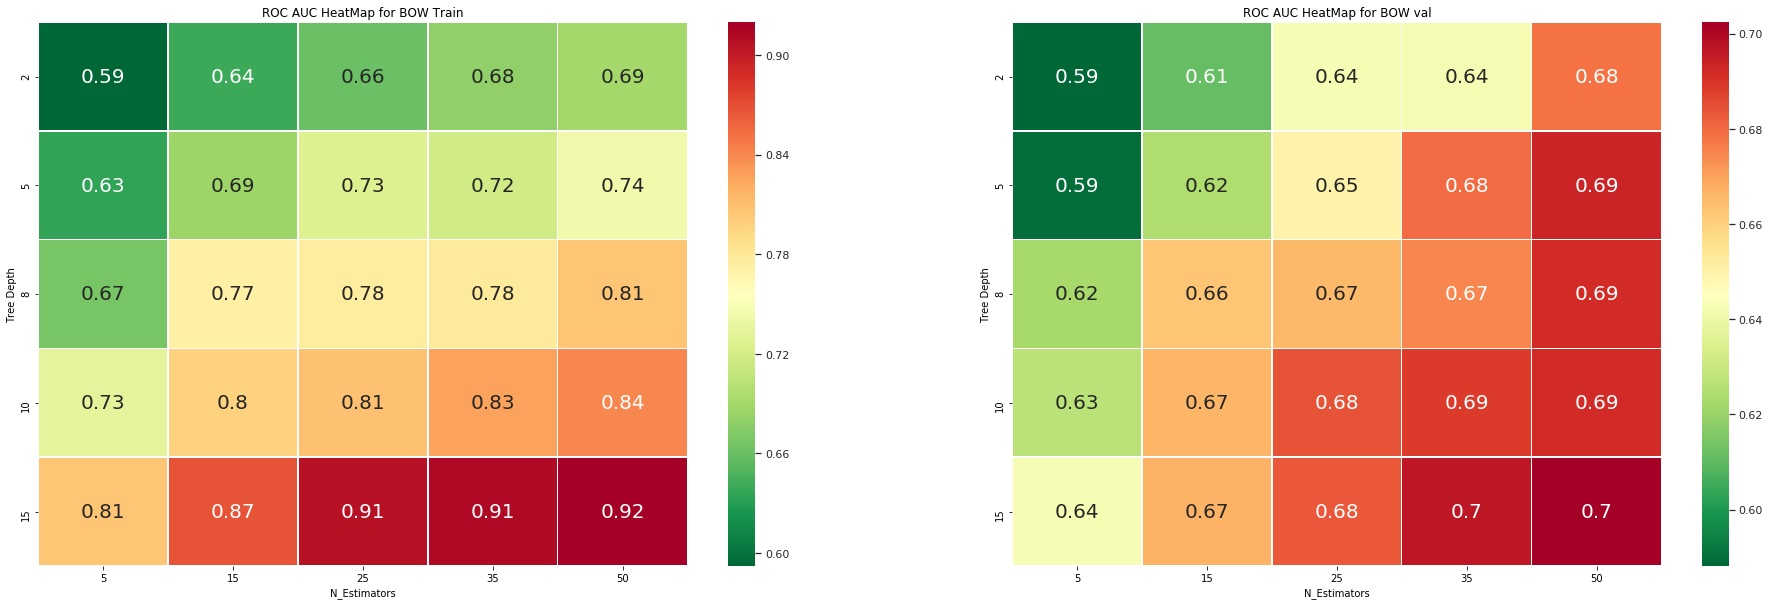

In [126]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#ax=sn.heatmap(sol)
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
#https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe
#https://www.kaggle.com/jesucristo/fraud-detection-eda-model-cv#Data
import seaborn as sn
fig, ax = plt.subplots(1, 2, figsize=(32,10))

sn.set(font_scale=1)#for label size
sn.heatmap(sol_train, ax=ax[0], cmap='RdYlGn_r',linewidths=0.5, annot_kws={"size": 20},annot=True)# font size
ax[0].set_xlabel('N_Estimators')
ax[0].set_ylabel('Tree Depth'); 
ax[0].set_title('ROC AUC HeatMap for BOW Train'); 

sn.heatmap(sol_val, ax=ax[1], cmap='RdYlGn_r',linewidths=0.5, annot_kws={"size": 20}, annot=True)# font size
ax[1].set_xlabel('N_Estimators')
ax[1].set_ylabel('Tree Depth'); 
ax[1].set_title('ROC AUC HeatMap for BOW val');

plt.show()

### Conclusion
- Best value of n_estimators and tree depth using both train & CV dataset is 35 and 15.

### 2.4.1.3 Plotting ROC Curve for BOW

In [127]:
rfc_bow =RandomForestClassifier(n_estimators=n_est_bow, criterion='gini', max_depth=depth_bow,
                                     min_samples_split=split_bow,n_jobs=-1,class_weight='balanced')
#clf.fit(x_sentiment_train,y_train)

In [128]:
rfc_bow=rfc_bow.fit(x_bow_train,y_train)

y_bow_prob_val = rfc_bow.predict_proba(x_bow_val.toarray())
y_bow_prob_test = rfc_bow.predict_proba(x_bow_test.toarray())
y_bow_prob_train = rfc_bow.predict_proba(x_bow_train.toarray())

In [129]:
fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_bow_prob_train[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)
fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_bow_prob_val[:, 1])
roc_auc_val = auc(fpr_val, tpr_val)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_bow_prob_test[:, 1])
roc_auc_bow_test = auc(fpr_test, tpr_test)

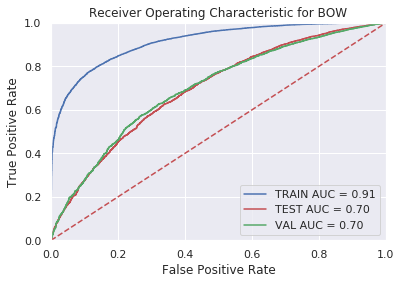

In [130]:
plt.title('Receiver Operating Characteristic for BOW')
plt.plot(fpr_train, tpr_train, 'b', label = 'TRAIN AUC = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'r', label = 'TEST AUC = %0.2f' % roc_auc_bow_test)
plt.plot(fpr_val, tpr_val, 'g', label = 'VAL AUC = %0.2f' % roc_auc_val)
#plt.plot(fpr_val, tpr_val, 'g', label = 'VAL AUC = %0.2f' % roc_auc_val)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusion
- Test and CV auc value is 0.70.
- This implies a good model.

### 2.4.1.4 Plotting Confusion Matrix for BOW

In [131]:
y_pred_bow_test = rfc_bow.predict(x_bow_test)
y_pred_bow_train = rfc_bow.predict(x_bow_train)
y_pred_bow_val = rfc_bow.predict(x_bow_val)

In [132]:
#https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb

confusion_matrix_bow_test = confusion_matrix(y_test, y_pred_bow_test)

TP_test = confusion_matrix_bow_test[1, 1]
TN_test = confusion_matrix_bow_test[0, 0]
FP_test = confusion_matrix_bow_test[0, 1]
FN_test = confusion_matrix_bow_test[1, 0]
TPR_test= TP_test / (FN_test + TP_test)
TNR_test= TN_test / (TN_test + FP_test)
FPR_test= FP_test / (TN_test + FP_test)
FNR_test = FN_test / (FN_test+TP_test)

confusion_matrix_bow_train = confusion_matrix(y_train, y_pred_bow_train)
TP_train = confusion_matrix_bow_train[1, 1]
TN_train = confusion_matrix_bow_train[0, 0]
FP_train = confusion_matrix_bow_train[0, 1]
FN_train = confusion_matrix_bow_train[1, 0]
TPR_train= TP_train / (FN_train + TP_train)
TNR_train= TN_train / (TN_train + FP_train)
FPR_train= FP_train / (TN_train + FP_train)
FNR_train = FN_train / (FN_train+TP_train)

confusion_matrix_bow_val = confusion_matrix(y_val, y_pred_bow_val)
TP_val = confusion_matrix_bow_val[1, 1]
TN_val = confusion_matrix_bow_val[0, 0]
FP_val = confusion_matrix_bow_val[0, 1]
FN_val = confusion_matrix_bow_val[1, 0]
TPR_val= TP_val / (FN_val + TP_val)
TNR_val= TN_val / (TN_val + FP_val)
FPR_val= FP_val / (TN_val + FP_val)
FNR_val = FN_val / (FN_val+TP_val)

from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Data", "TPR","TNR","FPR","FNR"]
x.add_row(["Train",TPR_train,TNR_train,FPR_train,FNR_train])
x.add_row(["Test",TPR_test,TNR_test,FPR_test,FNR_test])
x.add_row(["Validation",TPR_val,TNR_val,FPR_val,FNR_val])

print(x)

+------------+--------------------+--------------------+---------------------+---------------------+
|    Data    |        TPR         |        TNR         |         FPR         |         FNR         |
+------------+--------------------+--------------------+---------------------+---------------------+
|   Train    | 0.8568849354881325 | 0.7842702169625246 | 0.21572978303747534 | 0.14311506451186753 |
|    Test    | 0.8145138089758343 | 0.4428341384863124 |  0.5571658615136876 | 0.18548619102416572 |
| Validation | 0.8215166461159062 | 0.4226566992524439 |  0.577343300747556  |  0.1784833538840937 |
+------------+--------------------+--------------------+---------------------+---------------------+


### Conclusion: 
- For a good model, TPR/TNR should be high and FPR/FNR should be low.
- In this model, TPR/TNR are 0.81/0.44 while FPR/FNR are also high at 0.55/0.18.

### 2.4.1.5 Plotting Confusion Matrix for BOW

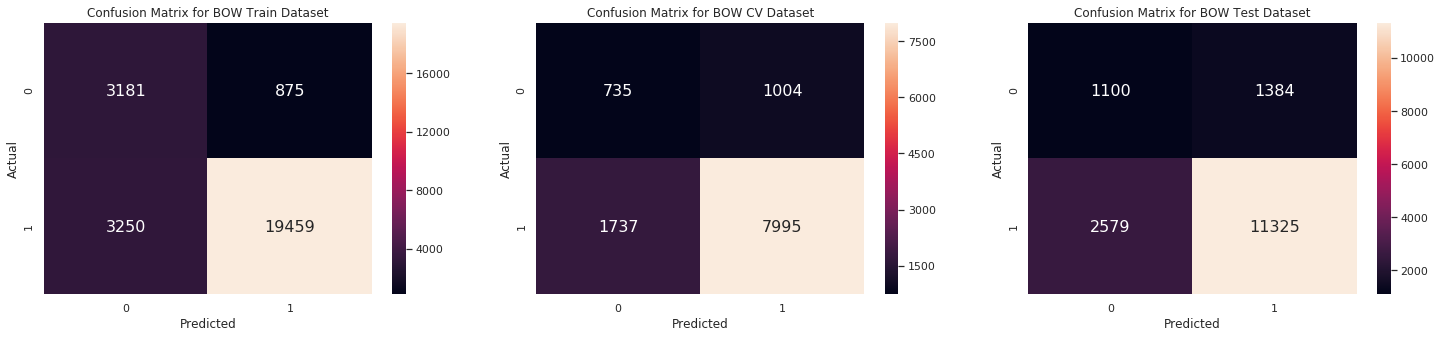

In [133]:
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# labels, title and ticks
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#https://www.kaggle.com/jesucristo/fraud-detection-eda-model-cv#Data
import seaborn as sn
fig, ax = plt.subplots(1, 3, figsize=(25,5))
sn.set(font_scale=1)#for label size

sn.heatmap(confusion_matrix_bow_train,ax=ax[0], annot=True,annot_kws={"size": 16},fmt='g')# font size
ax[0].set_ylabel('Actual')
ax[0].set_xlabel('Predicted'); 
ax[0].set_title('Confusion Matrix for BOW Train Dataset'); 
ax[0].xaxis.set_ticklabels(['0','1'])
ax[0].yaxis.set_ticklabels(['0','1']);

sn.heatmap(confusion_matrix_bow_val,ax=ax[1], annot=True,annot_kws={"size": 16},fmt='g')# font size
ax[1].set_ylabel('Actual')
ax[1].set_xlabel('Predicted'); 
ax[1].set_title('Confusion Matrix for BOW CV Dataset'); 
ax[1].xaxis.set_ticklabels(['0','1'])
ax[1].yaxis.set_ticklabels(['0','1']);

sn.heatmap(confusion_matrix_bow_test,ax=ax[2], annot=True,annot_kws={"size": 16},fmt='g')# font size
ax[2].set_ylabel('Actual')
ax[2].set_xlabel('Predicted'); 
ax[2].set_title('Confusion Matrix for BOW Test Dataset'); 
ax[2].xaxis.set_ticklabels(['0','1'])
ax[2].yaxis.set_ticklabels(['0','1']);

plt.show()

## 2.4.2 RandomForestClassifier on TFIDF

### 2.4.2.1 Running GridSearchCV for hyperparameter tuning.

In [134]:
start_time = time.time()
rfc=RandomForestClassifier(class_weight='balanced',min_samples_split=10,criterion='gini')
gs=GridSearchCV(rfc,grid_parms,verbose=True,scoring = 'roc_auc',n_jobs=-1,refit='AUC', 
                return_train_score=True,cv=2)
gs_result=gs.fit(x_tfidf_train,y_train.values.reshape(-1,1))

# Summarize results
print("Best: %f using %s" % (gs_result.best_score_, gs_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

depth_tfidf = gs_result.best_params_['max_depth']
split_tfidf = 10
n_est_tfidf = gs_result.best_params_['n_estimators']

Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.6s finished


Best: 0.691459 using {'max_depth': 10, 'n_estimators': 50}
Execution time: 7.455273866653442 ms


### Conclusion
- Best value for hyperparameters values are 'max_depth': 10, 'n_estimators': 50

### 2.4.2.2 Hyperparameter tuning manually

In [135]:
sol_train=pd.DataFrame(index=depth, columns=n_est)

for d in tqdm(depth):
    for n in n_est:
        rfc_tfidf = RandomForestClassifier(n_estimators=n,criterion='gini', max_depth=d,
                                     min_samples_split=split_tfidf,n_jobs=-1,class_weight='balanced')
        rfc_tfidf.fit(x_tfidf_train, y_train.values.reshape(-1,1))
        y_tfidf_prob_train = rfc_tfidf.predict_proba(x_tfidf_train.toarray())
        fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_tfidf_prob_train[:, 1])
        roc_auc_train = auc(fpr_train, tpr_train)
        sol_train.at[d,n] = roc_auc_train

#https://stackoverflow.com/questions/30485986/type-error-in-visualising-pandas-dataframe-as-heatmap
sol_train=sol_train[sol_train.columns].astype(float)

sol_val=pd.DataFrame(index=depth, columns=n_est)
for d in tqdm(depth):
    for n in n_est:
        rfc_tfidf = RandomForestClassifier(n_estimators=n,criterion='gini', max_depth=d,
                                     min_samples_split=split_tfidf,n_jobs=-1,class_weight='balanced')
        rfc_tfidf.fit(x_tfidf_train, y_train.values.reshape(-1,1))
        y_tfidf_prob_val = rfc_tfidf.predict_proba(x_tfidf_val.toarray())
        fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_tfidf_prob_val[:, 1])
        roc_auc_val = auc(fpr_val, tpr_val)
        sol_val.at[d,n] = roc_auc_val
        
#https://stackoverflow.com/questions/30485986/type-error-in-visualising-pandas-dataframe-as-heatmap
sol_val=sol_val[sol_val.columns].astype(float)

100%|██████████| 5/5 [00:31<00:00,  6.30s/it]


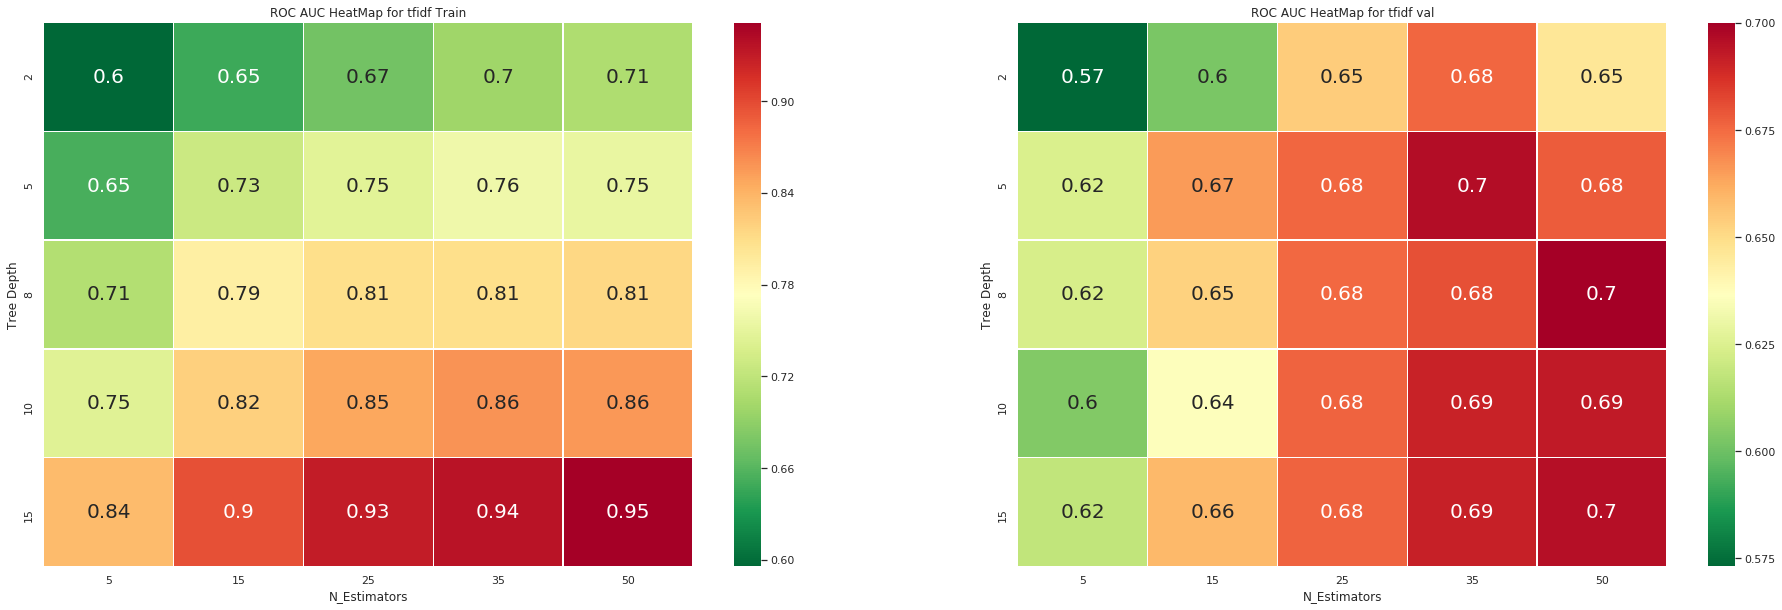

In [136]:
import seaborn as sn
fig, ax = plt.subplots(1, 2, figsize=(32,10))

sn.set(font_scale=1)#for label size
sn.heatmap(sol_train, ax=ax[0], cmap='RdYlGn_r',linewidths=0.5, annot_kws={"size": 20},annot=True)# font size
ax[0].set_xlabel('N_Estimators')
ax[0].set_ylabel('Tree Depth'); 
ax[0].set_title('ROC AUC HeatMap for tfidf Train'); 

sn.heatmap(sol_val, ax=ax[1], cmap='RdYlGn_r',linewidths=0.5, annot_kws={"size": 20}, annot=True)# font size
ax[1].set_xlabel('N_Estimators')
ax[1].set_ylabel('Tree Depth'); 
ax[1].set_title('ROC AUC HeatMap for tfidf val');

plt.show()

### Conclusion
- Best hyperparameter values for depth and n_estimator is 5 & 35 using manual method.

### 2.4.2.3 ROC Curve for TFIDF

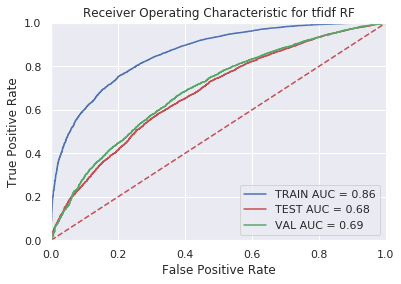

In [137]:
rfc_tfidf =RandomForestClassifier(n_estimators=n_est_tfidf, criterion='gini', max_depth=depth_tfidf,
                                     min_samples_split=split_tfidf,n_jobs=-1,class_weight='balanced')
rfc_tfidf=rfc_tfidf.fit(x_tfidf_train,y_train)

y_tfidf_prob_val = rfc_tfidf.predict_proba(x_tfidf_val.toarray())
y_tfidf_prob_test = rfc_tfidf.predict_proba(x_tfidf_test.toarray())
y_tfidf_prob_train = rfc_tfidf.predict_proba(x_tfidf_train.toarray())

fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_tfidf_prob_train[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)
fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_tfidf_prob_val[:, 1])
roc_auc_val = auc(fpr_val, tpr_val)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_tfidf_prob_test[:, 1])
roc_auc_tfidf_test = auc(fpr_test, tpr_test)

plt.title('Receiver Operating Characteristic for tfidf RF')
plt.plot(fpr_train, tpr_train, 'b', label = 'TRAIN AUC = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'r', label = 'TEST AUC = %0.2f' % roc_auc_tfidf_test)
plt.plot(fpr_val, tpr_val, 'g', label = 'VAL AUC = %0.2f' % roc_auc_val)
#plt.plot(fpr_val, tpr_val, 'g', label = 'VAL AUC = %0.2f' % roc_auc_val)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusion
- Test and CV auc value is 0.68 & 0.69.
- This implies a good model.

### 2.4.2.4 Confusion Matrix for TFIDF

In [138]:
y_pred_tfidf_test = rfc_tfidf.predict(x_tfidf_test)
y_pred_tfidf_train = rfc_tfidf.predict(x_tfidf_train)
y_pred_tfidf_val = rfc_tfidf.predict(x_tfidf_val)

In [139]:
#https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb

confusion_matrix_tfidf_test = confusion_matrix(y_test, y_pred_tfidf_test)

TP_test = confusion_matrix_tfidf_test[1, 1]
TN_test = confusion_matrix_tfidf_test[0, 0]
FP_test = confusion_matrix_tfidf_test[0, 1]
FN_test = confusion_matrix_tfidf_test[1, 0]
TPR_test= TP_test / (FN_test + TP_test)
TNR_test= TN_test / (TN_test + FP_test)
FPR_test= FP_test / (TN_test + FP_test)
FNR_test = FN_test / (FN_test+TP_test)

confusion_matrix_tfidf_train = confusion_matrix(y_train, y_pred_tfidf_train)
TP_train = confusion_matrix_tfidf_train[1, 1]
TN_train = confusion_matrix_tfidf_train[0, 0]
FP_train = confusion_matrix_tfidf_train[0, 1]
FN_train = confusion_matrix_tfidf_train[1, 0]
TPR_train= TP_train / (FN_train + TP_train)
TNR_train= TN_train / (TN_train + FP_train)
FPR_train= FP_train / (TN_train + FP_train)
FNR_train = FN_train / (FN_train+TP_train)

confusion_matrix_tfidf_val = confusion_matrix(y_val, y_pred_tfidf_val)
TP_val = confusion_matrix_tfidf_val[1, 1]
TN_val = confusion_matrix_tfidf_val[0, 0]
FP_val = confusion_matrix_tfidf_val[0, 1]
FN_val = confusion_matrix_tfidf_val[1, 0]
TPR_val= TP_val / (FN_val + TP_val)
TNR_val= TN_val / (TN_val + FP_val)
FPR_val= FP_val / (TN_val + FP_val)
FNR_val = FN_val / (FN_val+TP_val)

#from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Data", "TPR","TNR","FPR","FNR"]
x.add_row(["Train",TPR_train,TNR_train,FPR_train,FNR_train])
x.add_row(["Test",TPR_test,TNR_test,FPR_test,FNR_test])
x.add_row(["Validation",TPR_val,TNR_val,FPR_val,FNR_val])

print(x)

+------------+--------------------+---------------------+--------------------+---------------------+
|    Data    |        TPR         |         TNR         |        FPR         |         FNR         |
+------------+--------------------+---------------------+--------------------+---------------------+
|   Train    | 0.8217006473204457 |  0.7214003944773175 | 0.2785996055226824 | 0.17829935267955435 |
|    Test    | 0.7766829689298044 | 0.46215780998389694 | 0.537842190016103  | 0.22331703107019563 |
| Validation | 0.7900739827373613 | 0.46981023576768255 | 0.5301897642323175 |  0.2099260172626387 |
+------------+--------------------+---------------------+--------------------+---------------------+


### Conclusion: 
- For a good model, TPR/TNR should be high and FPR/FNR should be low.
- In this model, TPR/TNR are at 0.77/0.46 while FPR/FNR are also high at 0.53/0.22.

### 2.4.2.5 Plotting confusion Matrix

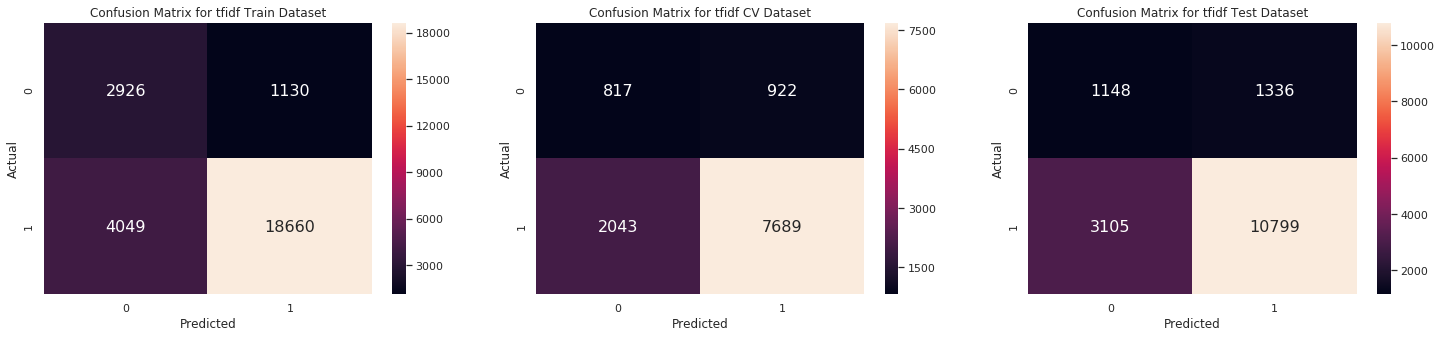

In [140]:
#https://www.kaggle.com/jesucristo/fraud-detection-eda-model-cv#Data
import seaborn as sn
fig, ax = plt.subplots(1, 3, figsize=(25,5))
sn.set(font_scale=1)#for label size

sn.heatmap(confusion_matrix_tfidf_train,ax=ax[0], annot=True,annot_kws={"size": 16},fmt='g')# font size
ax[0].set_ylabel('Actual')
ax[0].set_xlabel('Predicted'); 
ax[0].set_title('Confusion Matrix for tfidf Train Dataset'); 
ax[0].xaxis.set_ticklabels(['0','1'])
ax[0].yaxis.set_ticklabels(['0','1']);

sn.heatmap(confusion_matrix_tfidf_val,ax=ax[1], annot=True,annot_kws={"size": 16},fmt='g')# font size
ax[1].set_ylabel('Actual')
ax[1].set_xlabel('Predicted'); 
ax[1].set_title('Confusion Matrix for tfidf CV Dataset'); 
ax[1].xaxis.set_ticklabels(['0','1'])
ax[1].yaxis.set_ticklabels(['0','1']);

sn.heatmap(confusion_matrix_tfidf_test,ax=ax[2], annot=True,annot_kws={"size": 16},fmt='g')# font size
ax[2].set_ylabel('Actual')
ax[2].set_xlabel('Predicted'); 
ax[2].set_title('Confusion Matrix for tfidf Test Dataset'); 
ax[2].xaxis.set_ticklabels(['0','1'])
ax[2].yaxis.set_ticklabels(['0','1']);

plt.show()

## 2.4.3 RandomForestClassifier on Average W2V

### 2.4.3.1 Finding Hyperparameters using GridSearchCV

In [141]:
start_time = time.time()

rfc=RandomForestClassifier(class_weight='balanced',min_samples_split=10,criterion='gini')
gs=GridSearchCV(rfc,grid_parms,verbose=True,scoring = 'roc_auc',n_jobs=-1,refit='AUC', 
                return_train_score=True,cv=2)
gs_result=gs.fit(x_avgw2v_train,y_train.values.reshape(-1,1))

# Summarize results
print("Best: %f using %s" % (gs_result.best_score_, gs_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

depth_avgw2v = gs_result.best_params_['max_depth']
split_avgw2v = 10
n_est_avgw2v = gs_result.best_params_['n_estimators']

Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   58.1s finished


Best: 0.685297 using {'max_depth': 5, 'n_estimators': 50}
Execution time: 77.64013385772705 ms


### Conclusion
- Best hyperparameter values are 'max_depth': 5, 'n_estimators': 50 using GridSearchCV.

### 2.4.3.2 Finding Hyperparameter manually

In [142]:
sol_train=pd.DataFrame(index=depth, columns=n_est)
for d in tqdm(depth):
    for n in n_est:
        rfc_avgw2v = RandomForestClassifier(n_estimators=n,criterion='gini', max_depth=d,
                                     min_samples_split=split_avgw2v,n_jobs=-1,class_weight='balanced')
        rfc_avgw2v.fit(x_avgw2v_train, y_train.values.reshape(-1,1))
        y_avgw2v_prob_train = rfc_avgw2v.predict_proba(x_avgw2v_train.toarray())
        fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_avgw2v_prob_train[:, 1])
        roc_auc_train = auc(fpr_train, tpr_train)
        sol_train.at[d,n] = roc_auc_train

#https://stackoverflow.com/questions/30485986/type-error-in-visualising-pandas-dataframe-as-heatmap
sol_train=sol_train[sol_train.columns].astype(float)

sol_val=pd.DataFrame(index=depth, columns=n_est)
for d in tqdm(depth):
    for n in n_est:
        rfc_avgw2v = RandomForestClassifier(n_estimators=n,criterion='gini', max_depth=d,
                                     min_samples_split=split_avgw2v,n_jobs=-1,class_weight='balanced')
        rfc_avgw2v.fit(x_avgw2v_train, y_train.values.reshape(-1,1))
        y_avgw2v_prob_val = rfc_avgw2v.predict_proba(x_avgw2v_val.toarray())
        fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_avgw2v_prob_val[:, 1])
        roc_auc_val = auc(fpr_val, tpr_val)
        sol_val.at[d,n] = roc_auc_val
        
#https://stackoverflow.com/questions/30485986/type-error-in-visualising-pandas-dataframe-as-heatmap
sol_val=sol_val[sol_val.columns].astype(float)

100%|██████████| 5/5 [01:04<00:00, 14.24s/it]


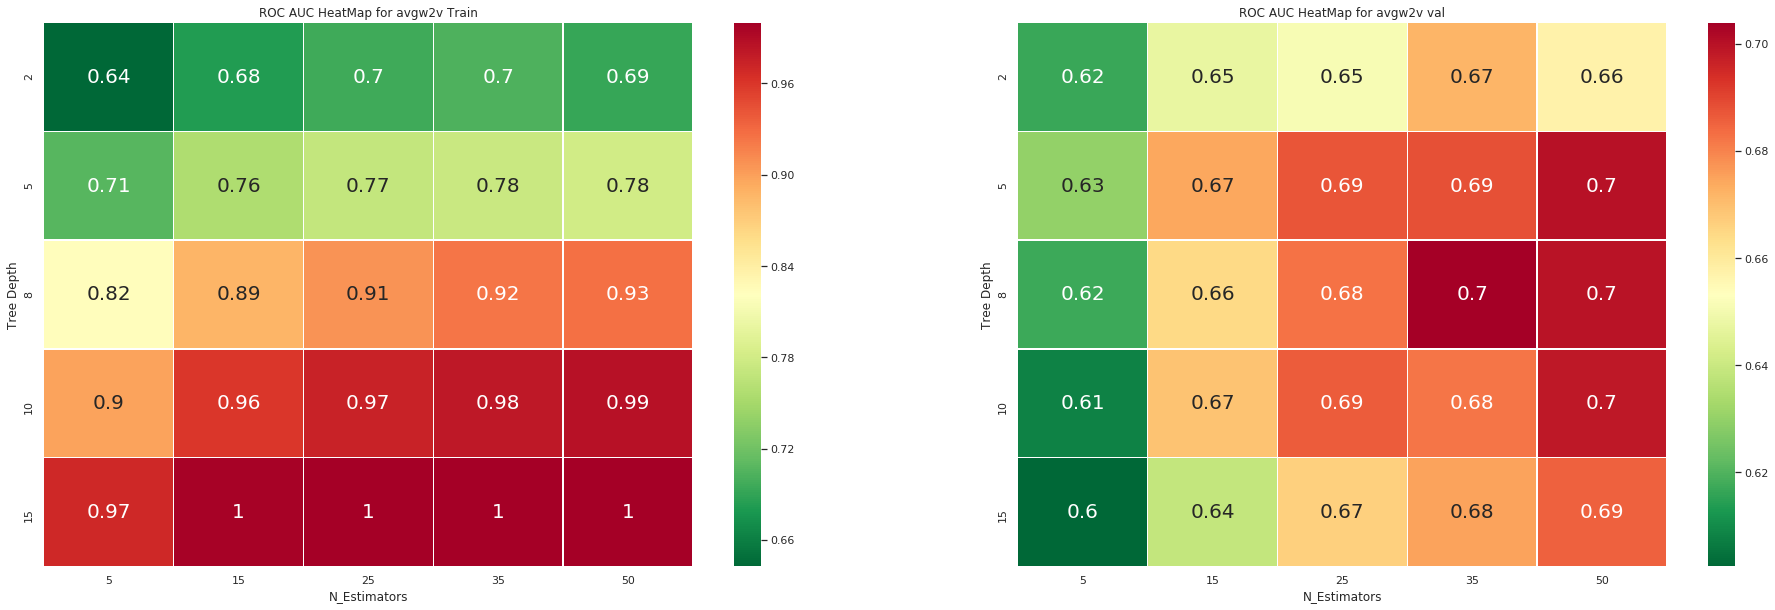

In [143]:
import seaborn as sn
fig, ax = plt.subplots(1, 2, figsize=(32,10))

sn.set(font_scale=1)#for label size
sn.heatmap(sol_train, ax=ax[0], cmap='RdYlGn_r',linewidths=0.5, annot_kws={"size": 20},annot=True)# font size
ax[0].set_xlabel('N_Estimators')
ax[0].set_ylabel('Tree Depth'); 
ax[0].set_title('ROC AUC HeatMap for avgw2v Train'); 

sn.heatmap(sol_val, ax=ax[1], cmap='RdYlGn_r',linewidths=0.5, annot_kws={"size": 20}, annot=True)# font size
ax[1].set_xlabel('N_Estimators')
ax[1].set_ylabel('Tree Depth'); 
ax[1].set_title('ROC AUC HeatMap for avgw2v val');

plt.show()

### Conclusion
- Best hyperparameter values are 'max_depth': 8, 'n_estimators': 35

### 2.4.3.3 Plotting ROC Curve for Average W2V

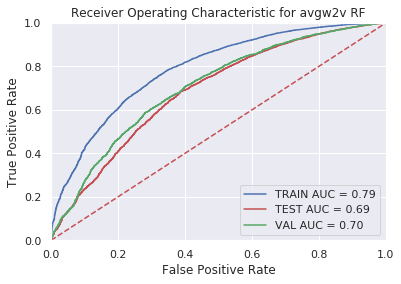

In [144]:
rfc_avgw2v =RandomForestClassifier(n_estimators=n_est_avgw2v, criterion='gini', max_depth=depth_avgw2v,
                                     min_samples_split=split_avgw2v,n_jobs=-1,class_weight='balanced')
rfc_avgw2v=rfc_avgw2v.fit(x_avgw2v_train,y_train)

y_avgw2v_prob_val = rfc_avgw2v.predict_proba(x_avgw2v_val.toarray())
y_avgw2v_prob_test = rfc_avgw2v.predict_proba(x_avgw2v_test.toarray())
y_avgw2v_prob_train = rfc_avgw2v.predict_proba(x_avgw2v_train.toarray())

fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_avgw2v_prob_train[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)
fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_avgw2v_prob_val[:, 1])
roc_auc_val = auc(fpr_val, tpr_val)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_avgw2v_prob_test[:, 1])
roc_auc_avgw2v_test = auc(fpr_test, tpr_test)

plt.title('Receiver Operating Characteristic for avgw2v RF')
plt.plot(fpr_train, tpr_train, 'b', label = 'TRAIN AUC = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'r', label = 'TEST AUC = %0.2f' % roc_auc_avgw2v_test)
plt.plot(fpr_val, tpr_val, 'g', label = 'VAL AUC = %0.2f' % roc_auc_val)
#plt.plot(fpr_val, tpr_val, 'g', label = 'VAL AUC = %0.2f' % roc_auc_val)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusion
- Test and CV auc value is 0.69 & 0.70.
- This implies a good model.

### 2.4.3.4 Displaying Confusion Matrix

In [145]:
y_pred_avgw2v_test = rfc_avgw2v.predict(x_avgw2v_test)
y_pred_avgw2v_train = rfc_avgw2v.predict(x_avgw2v_train)
y_pred_avgw2v_val = rfc_avgw2v.predict(x_avgw2v_val)

In [146]:
#https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb

confusion_matrix_avgw2v_test = confusion_matrix(y_test, y_pred_avgw2v_test)

TP_test = confusion_matrix_avgw2v_test[1, 1]
TN_test = confusion_matrix_avgw2v_test[0, 0]
FP_test = confusion_matrix_avgw2v_test[0, 1]
FN_test = confusion_matrix_avgw2v_test[1, 0]
TPR_test= TP_test / (FN_test + TP_test)
TNR_test= TN_test / (TN_test + FP_test)
FPR_test= FP_test / (TN_test + FP_test)
FNR_test = FN_test / (FN_test+TP_test)

confusion_matrix_avgw2v_train = confusion_matrix(y_train, y_pred_avgw2v_train)
TP_train = confusion_matrix_avgw2v_train[1, 1]
TN_train = confusion_matrix_avgw2v_train[0, 0]
FP_train = confusion_matrix_avgw2v_train[0, 1]
FN_train = confusion_matrix_avgw2v_train[1, 0]
TPR_train= TP_train / (FN_train + TP_train)
TNR_train= TN_train / (TN_train + FP_train)
FPR_train= FP_train / (TN_train + FP_train)
FNR_train = FN_train / (FN_train+TP_train)

confusion_matrix_avgw2v_val = confusion_matrix(y_val, y_pred_avgw2v_val)
TP_val = confusion_matrix_avgw2v_val[1, 1]
TN_val = confusion_matrix_avgw2v_val[0, 0]
FP_val = confusion_matrix_avgw2v_val[0, 1]
FN_val = confusion_matrix_avgw2v_val[1, 0]
TPR_val= TP_val / (FN_val + TP_val)
TNR_val= TN_val / (TN_val + FP_val)
FPR_val= FP_val / (TN_val + FP_val)
FNR_val = FN_val / (FN_val+TP_val)

#from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Data", "TPR","TNR","FPR","FNR"]
x.add_row(["Train",TPR_train,TNR_train,FPR_train,FNR_train])
x.add_row(["Test",TPR_test,TNR_test,FPR_test,FNR_test])
x.add_row(["Validation",TPR_val,TNR_val,FPR_val,FNR_val])

print(x)

+------------+--------------------+--------------------+---------------------+---------------------+
|    Data    |        TPR         |        TNR         |         FPR         |         FNR         |
+------------+--------------------+--------------------+---------------------+---------------------+
|   Train    | 0.7582015940816417 | 0.6767751479289941 | 0.32322485207100593 | 0.24179840591835836 |
|    Test    | 0.7167002301495973 | 0.5688405797101449 |  0.4311594202898551 |  0.2832997698504028 |
| Validation | 0.7305795314426634 | 0.5715928694652099 |  0.4284071305347901 | 0.26942046855733665 |
+------------+--------------------+--------------------+---------------------+---------------------+


### Conclusion: 
- For a good model, TPR/TNR should be high and FPR/FNR should be low.
- In this model, TPR is at 0.71/ TNR is above 0.56 while FPR is high at 0.43/ FNR is high at 0.28.

### 2.4.3.5 Plotting Confusion Matrix 

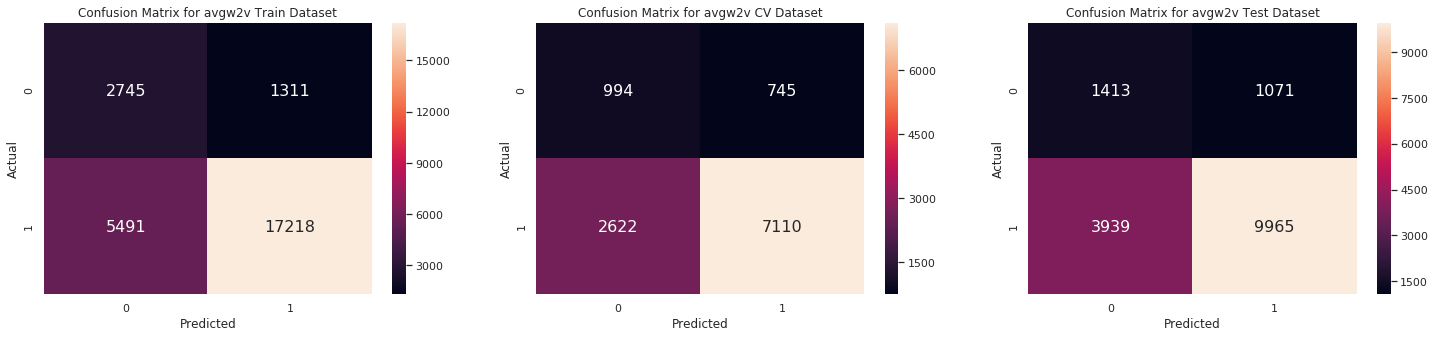

In [147]:
#https://www.kaggle.com/jesucristo/fraud-detection-eda-model-cv#Data
import seaborn as sn
fig, ax = plt.subplots(1, 3, figsize=(25,5))
sn.set(font_scale=1)#for label size

sn.heatmap(confusion_matrix_avgw2v_train,ax=ax[0], annot=True,annot_kws={"size": 16},fmt='g')# font size
ax[0].set_ylabel('Actual')
ax[0].set_xlabel('Predicted'); 
ax[0].set_title('Confusion Matrix for avgw2v Train Dataset'); 
ax[0].xaxis.set_ticklabels(['0','1'])
ax[0].yaxis.set_ticklabels(['0','1']);

sn.heatmap(confusion_matrix_avgw2v_val,ax=ax[1], annot=True,annot_kws={"size": 16},fmt='g')# font size
ax[1].set_ylabel('Actual')
ax[1].set_xlabel('Predicted'); 
ax[1].set_title('Confusion Matrix for avgw2v CV Dataset'); 
ax[1].xaxis.set_ticklabels(['0','1'])
ax[1].yaxis.set_ticklabels(['0','1']);

sn.heatmap(confusion_matrix_avgw2v_test,ax=ax[2], annot=True,annot_kws={"size": 16},fmt='g')# font size
ax[2].set_ylabel('Actual')
ax[2].set_xlabel('Predicted'); 
ax[2].set_title('Confusion Matrix for avgw2v Test Dataset'); 
ax[2].xaxis.set_ticklabels(['0','1'])
ax[2].yaxis.set_ticklabels(['0','1']);

plt.show()

## 2.4.4 RandomForestClassifier on TFIDF W2V

### 2.4.4.1 Finding Hyperparameter using GridSearchCV

In [148]:
#https://stackoverflow.com/questions/52539986/scoring-in-gridsearch-cv
#https://www.datacamp.com/community/tutorials/random-forests-classifier-python
from sklearn.model_selection import GridSearchCV
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import roc_auc_score,make_scorer,accuracy_score

#depth=[2, 3, 4, 5, 6, 7, 8, 9, 10,20]
#n_est=[5, 10, 50, 100, 200, 500, 1000]
grid_parms={'max_depth':depth,'n_estimators':n_est}

start_time = time.time()

rfc=RandomForestClassifier(class_weight='balanced',min_samples_split=10,criterion='gini',n_jobs=-1)
gs=GridSearchCV(rfc,grid_parms,verbose=True,scoring = 'roc_auc',refit='AUC', 
                return_train_score=True,cv=2)
gs_result=gs.fit(x_tfidfw2v_train,y_train.values.reshape(-1,1))

# Summarize results
print("Best: %f using %s" % (gs_result.best_score_, gs_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

depth_tfidfw2v = gs_result.best_params_['max_depth']
split_tfidfw2v = 10
n_est_tfidfw2v = gs_result.best_params_['n_estimators']

Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


Best: 0.684462 using {'max_depth': 5, 'n_estimators': 35}
Execution time: 83.84995007514954 ms


### Conclusion
- Best hyperparameter values are 'max_depth': 5, 'n_estimators': 35 using gridsearchcv.

### 2.4.4.1 Finding Hyperparameter manually

In [149]:
sol_train=pd.DataFrame(index=depth, columns=n_est)
for d in tqdm(depth):
    for n in n_est:
        rfc_tfidfw2v = RandomForestClassifier(n_estimators=n,criterion='gini', max_depth=d,
                                     min_samples_split=split_tfidfw2v,n_jobs=-1,class_weight='balanced')
        rfc_tfidfw2v.fit(x_tfidfw2v_train, y_train.values.reshape(-1,1))
        y_tfidfw2v_prob_train = rfc_tfidfw2v.predict_proba(x_tfidfw2v_train.toarray())
        fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_tfidfw2v_prob_train[:, 1])
        roc_auc_train = auc(fpr_train, tpr_train)
        sol_train.at[d,n] = roc_auc_train

#https://stackoverflow.com/questions/30485986/type-error-in-visualising-pandas-dataframe-as-heatmap
sol_train=sol_train[sol_train.columns].astype(float)
sol_val=pd.DataFrame(index=depth, columns=n_est)
for d in tqdm(depth):
    for n in n_est:
        rfc_tfidfw2v = RandomForestClassifier(n_estimators=n,criterion='gini', max_depth=d,
                                     min_samples_split=split_tfidfw2v,n_jobs=-1,class_weight='balanced')
        rfc_tfidfw2v.fit(x_tfidfw2v_train, y_train.values.reshape(-1,1))
        y_tfidfw2v_prob_val = rfc_tfidfw2v.predict_proba(x_tfidfw2v_val.toarray())
        fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_tfidfw2v_prob_val[:, 1])
        roc_auc_val = auc(fpr_val, tpr_val)
        sol_val.at[d,n] = roc_auc_val
        
#https://stackoverflow.com/questions/30485986/type-error-in-visualising-pandas-dataframe-as-heatmap
sol_val=sol_val[sol_val.columns].astype(float)

100%|██████████| 5/5 [01:05<00:00, 14.37s/it]


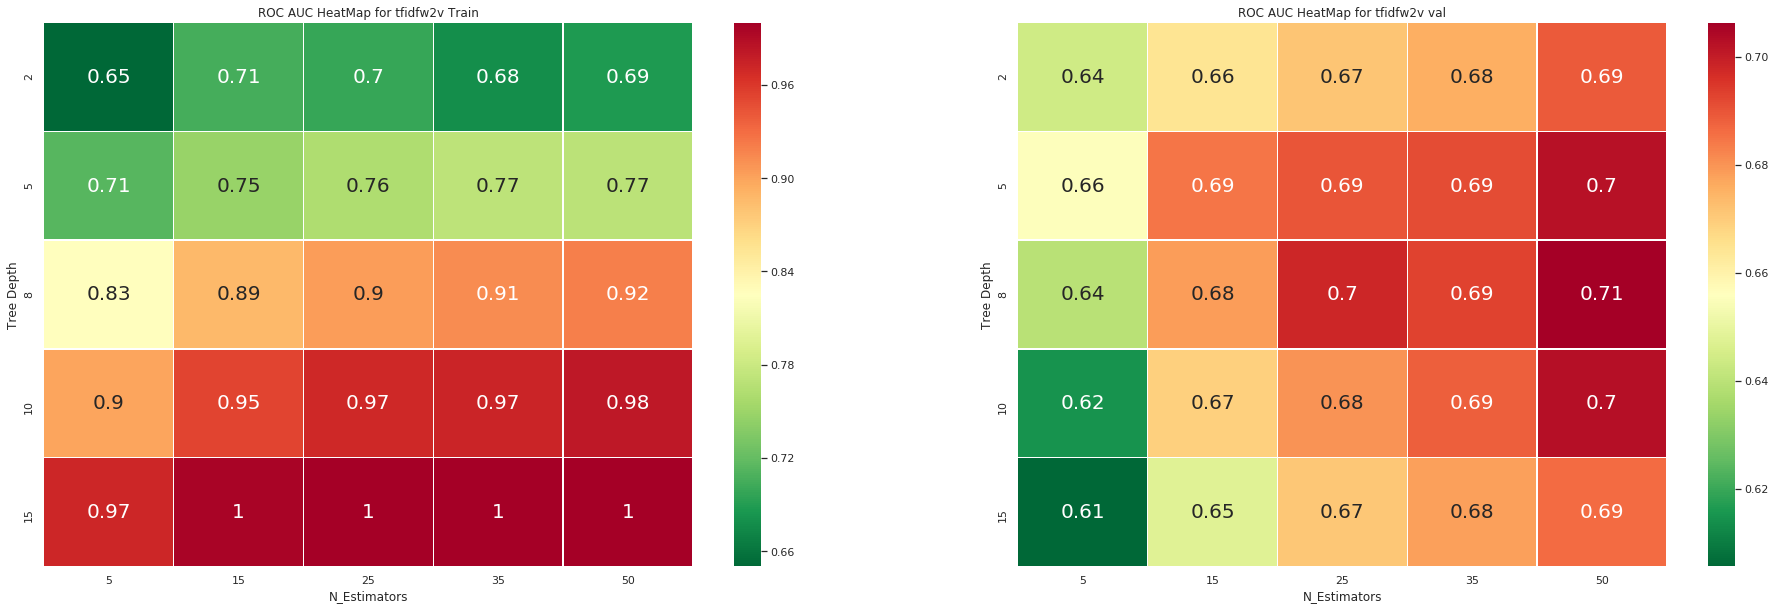

In [150]:
import seaborn as sn
fig, ax = plt.subplots(1, 2, figsize=(32,10))

sn.set(font_scale=1)#for label size
sn.heatmap(sol_train, ax=ax[0], cmap='RdYlGn_r',linewidths=0.5, annot_kws={"size": 20},annot=True)# font size
ax[0].set_xlabel('N_Estimators')
ax[0].set_ylabel('Tree Depth'); 
ax[0].set_title('ROC AUC HeatMap for tfidfw2v Train'); 

sn.heatmap(sol_val, ax=ax[1], cmap='RdYlGn_r',linewidths=0.5, annot_kws={"size": 20}, annot=True)# font size
ax[1].set_xlabel('N_Estimators')
ax[1].set_ylabel('Tree Depth'); 
ax[1].set_title('ROC AUC HeatMap for tfidfw2v val');

plt.show()

### Conclusion
- Best hyperparameter values are 'max_depth': 8, 'n_estimators': 25 using manual method.

### 2.4.4.2 Plotting ROC Curve for TFIDF W2V

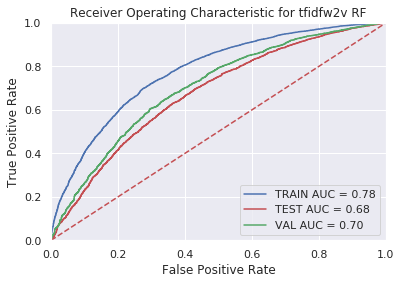

In [151]:
rfc_tfidfw2v =RandomForestClassifier(n_estimators=n_est_tfidfw2v, criterion='gini', max_depth=depth_tfidfw2v,
                                     min_samples_split=split_tfidfw2v,n_jobs=-1,class_weight='balanced')
rfc_tfidfw2v=rfc_tfidfw2v.fit(x_tfidfw2v_train,y_train)

y_tfidfw2v_prob_val = rfc_tfidfw2v.predict_proba(x_tfidfw2v_val.toarray())
y_tfidfw2v_prob_test = rfc_tfidfw2v.predict_proba(x_tfidfw2v_test.toarray())
y_tfidfw2v_prob_train = rfc_tfidfw2v.predict_proba(x_tfidfw2v_train.toarray())

fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_tfidfw2v_prob_train[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)
fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_tfidfw2v_prob_val[:, 1])
roc_auc_val = auc(fpr_val, tpr_val)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_tfidfw2v_prob_test[:, 1])
roc_auc_tfidfw2v_test = auc(fpr_test, tpr_test)

plt.title('Receiver Operating Characteristic for tfidfw2v RF')
plt.plot(fpr_train, tpr_train, 'b', label = 'TRAIN AUC = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'r', label = 'TEST AUC = %0.2f' % roc_auc_tfidfw2v_test)
plt.plot(fpr_val, tpr_val, 'g', label = 'VAL AUC = %0.2f' % roc_auc_val)
#plt.plot(fpr_val, tpr_val, 'g', label = 'VAL AUC = %0.2f' % roc_auc_val)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusion
- Test and CV auc value is 0.68 & 0.70.
- This implies a good model.

### 2.4.4.4 Displaying Confusion Matrix

In [152]:
y_pred_tfidfw2v_test = rfc_tfidfw2v.predict(x_tfidfw2v_test)
y_pred_tfidfw2v_train = rfc_tfidfw2v.predict(x_tfidfw2v_train)
y_pred_tfidfw2v_val = rfc_tfidfw2v.predict(x_tfidfw2v_val)


In [153]:
#https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb

confusion_matrix_tfidfw2v_test = confusion_matrix(y_test, y_pred_tfidfw2v_test)

TP_test = confusion_matrix_tfidfw2v_test[1, 1]
TN_test = confusion_matrix_tfidfw2v_test[0, 0]
FP_test = confusion_matrix_tfidfw2v_test[0, 1]
FN_test = confusion_matrix_tfidfw2v_test[1, 0]
TPR_test= TP_test / (FN_test + TP_test)
TNR_test= TN_test / (TN_test + FP_test)
FPR_test= FP_test / (TN_test + FP_test)
FNR_test = FN_test / (FN_test+TP_test)

confusion_matrix_tfidfw2v_train = confusion_matrix(y_train, y_pred_tfidfw2v_train)
TP_train = confusion_matrix_tfidfw2v_train[1, 1]
TN_train = confusion_matrix_tfidfw2v_train[0, 0]
FP_train = confusion_matrix_tfidfw2v_train[0, 1]
FN_train = confusion_matrix_tfidfw2v_train[1, 0]
TPR_train= TP_train / (FN_train + TP_train)
TNR_train= TN_train / (TN_train + FP_train)
FPR_train= FP_train / (TN_train + FP_train)
FNR_train = FN_train / (FN_train+TP_train)

confusion_matrix_tfidfw2v_val = confusion_matrix(y_val, y_pred_tfidfw2v_val)
TP_val = confusion_matrix_tfidfw2v_val[1, 1]
TN_val = confusion_matrix_tfidfw2v_val[0, 0]
FP_val = confusion_matrix_tfidfw2v_val[0, 1]
FN_val = confusion_matrix_tfidfw2v_val[1, 0]
TPR_val= TP_val / (FN_val + TP_val)
TNR_val= TN_val / (TN_val + FP_val)
FPR_val= FP_val / (TN_val + FP_val)
FNR_val = FN_val / (FN_val+TP_val)

from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Data", "TPR","TNR","FPR","FNR"]
x.add_row(["Train",TPR_train,TNR_train,FPR_train,FNR_train])
x.add_row(["Test",TPR_test,TNR_test,FPR_test,FNR_test])
x.add_row(["Validation",TPR_val,TNR_val,FPR_val,FNR_val])

print(x)

+------------+--------------------+--------------------+---------------------+---------------------+
|    Data    |        TPR         |        TNR         |         FPR         |         FNR         |
+------------+--------------------+--------------------+---------------------+---------------------+
|   Train    | 0.7313840327623409 | 0.6893491124260355 |  0.3106508875739645 | 0.26861596723765907 |
|    Test    | 0.6990074798619103 | 0.5652173913043478 | 0.43478260869565216 | 0.30099252013808975 |
| Validation | 0.7069461570078093 | 0.5905692926969522 |  0.4094307073030477 |  0.2930538429921907 |
+------------+--------------------+--------------------+---------------------+---------------------+


### Conclusion: 
- For a good model, TPR/TNR should be high and FPR/FNR should be low.
- In this model, TPR is above 0.5 at 0.69/ TNR is above 0.56 while FPR is at 0.430/ FNR is high at 0.30.

### 2.4.4.5 Plotting Confusion Matrix

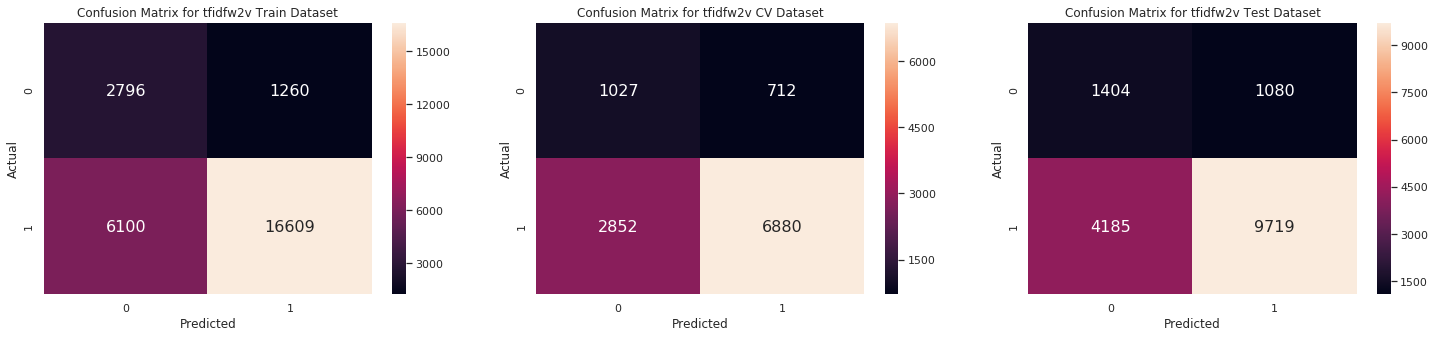

In [154]:
#https://www.kaggle.com/jesucristo/fraud-detection-eda-model-cv#Data
import seaborn as sn
fig, ax = plt.subplots(1, 3, figsize=(25,5))
sn.set(font_scale=1)#for label size

sn.heatmap(confusion_matrix_tfidfw2v_train,ax=ax[0], annot=True,annot_kws={"size": 16},fmt='g')# font size
ax[0].set_ylabel('Actual')
ax[0].set_xlabel('Predicted'); 
ax[0].set_title('Confusion Matrix for tfidfw2v Train Dataset'); 
ax[0].xaxis.set_ticklabels(['0','1'])
ax[0].yaxis.set_ticklabels(['0','1']);

sn.heatmap(confusion_matrix_tfidfw2v_val,ax=ax[1], annot=True,annot_kws={"size": 16},fmt='g')# font size
ax[1].set_ylabel('Actual')
ax[1].set_xlabel('Predicted'); 
ax[1].set_title('Confusion Matrix for tfidfw2v CV Dataset'); 
ax[1].xaxis.set_ticklabels(['0','1'])
ax[1].yaxis.set_ticklabels(['0','1']);

sn.heatmap(confusion_matrix_tfidfw2v_test,ax=ax[2], annot=True,annot_kws={"size": 16},fmt='g')# font size
ax[2].set_ylabel('Actual')
ax[2].set_xlabel('Predicted'); 
ax[2].set_title('Confusion Matrix for tfidfw2v Test Dataset'); 
ax[2].xaxis.set_ticklabels(['0','1'])
ax[2].yaxis.set_ticklabels(['0','1']);

plt.show()

<h1>2.5 GBDT Implementation  </h1>

## 2.5.1 GBDT Implementation for BOW

In [155]:
from xgboost import XGBClassifier

In [156]:
grid_parms={'max_depth':depth,'n_estimators':n_est}
              
start_time = time.time()

#https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
xgb=XGBClassifier(booster='gbtree',scale_pos_weight=1,objective='binary:logistic',gamma = 0.1,eval_metric='auc',seed=100)

gs=GridSearchCV(xgb,grid_parms,verbose=True,scoring = 'roc_auc',n_jobs=-1,refit='AUC', 
                return_train_score=True)
gs_result=gs.fit(x_bow_train,y_train.values.reshape(-1,1))

# Summarize results
print("Best: %f using %s" % (gs_result.best_score_, gs_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  1.1min finished


Best: 0.725649 using {'max_depth': 8, 'n_estimators': 50}
Execution time: 84.93550229072571 ms


## Conclusion:
- Best Hyperparameter value for Gridsearchcv is 'max_depth': 8, 'n_estimators': 50

In [157]:
depth_bow_gbdt = gs_result.best_params_['max_depth']
n_est_bow_gbdt = gs_result.best_params_['n_estimators']

In [158]:
sol_train=pd.DataFrame(index=depth, columns=n_est)
for d in tqdm(depth):
    for n in n_est:
        gbdt_bow = XGBClassifier(booster='gbtree',scale_pos_weight=1,objective='binary:logistic',
                                gamma = 0.1,eval_metric='auc',seed=100,max_depth=d,n_estimators=n)
        gbdt_bow.fit(x_bow_train, y_train.values.reshape(-1,1))
        y_bow_prob_train = gbdt_bow.predict_proba(x_bow_train.toarray())
        fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_bow_prob_train[:, 1])
        roc_auc_train = auc(fpr_train, tpr_train)
        sol_train.at[d,n] = roc_auc_train

#https://stackoverflow.com/questions/30485986/type-error-in-visualising-pandas-dataframe-as-heatmap
sol_train=sol_train[sol_train.columns].astype(float)

sol_val=pd.DataFrame(index=depth, columns=n_est)
for d in tqdm(depth):
    for n in n_est:
        gbdt_bow = XGBClassifier(booster='gbtree',scale_pos_weight=1,objective='binary:logistic',
                                gamma = 0.1,eval_metric='auc',seed=100,max_depth=d,n_estimators=n)
        gbdt_bow.fit(x_bow_train, y_train.values.reshape(-1,1))
        y_bow_prob_val = gbdt_bow.predict_proba(x_bow_val.toarray())
        fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_bow_prob_val[:, 1])
        roc_auc_val = auc(fpr_val, tpr_val)
        sol_val.at[d,n] = roc_auc_val
        
#https://stackoverflow.com/questions/30485986/type-error-in-visualising-pandas-dataframe-as-heatmap
sol_val=sol_val[sol_val.columns].astype(float)

100%|██████████| 5/5 [05:10<00:00, 67.91s/it]


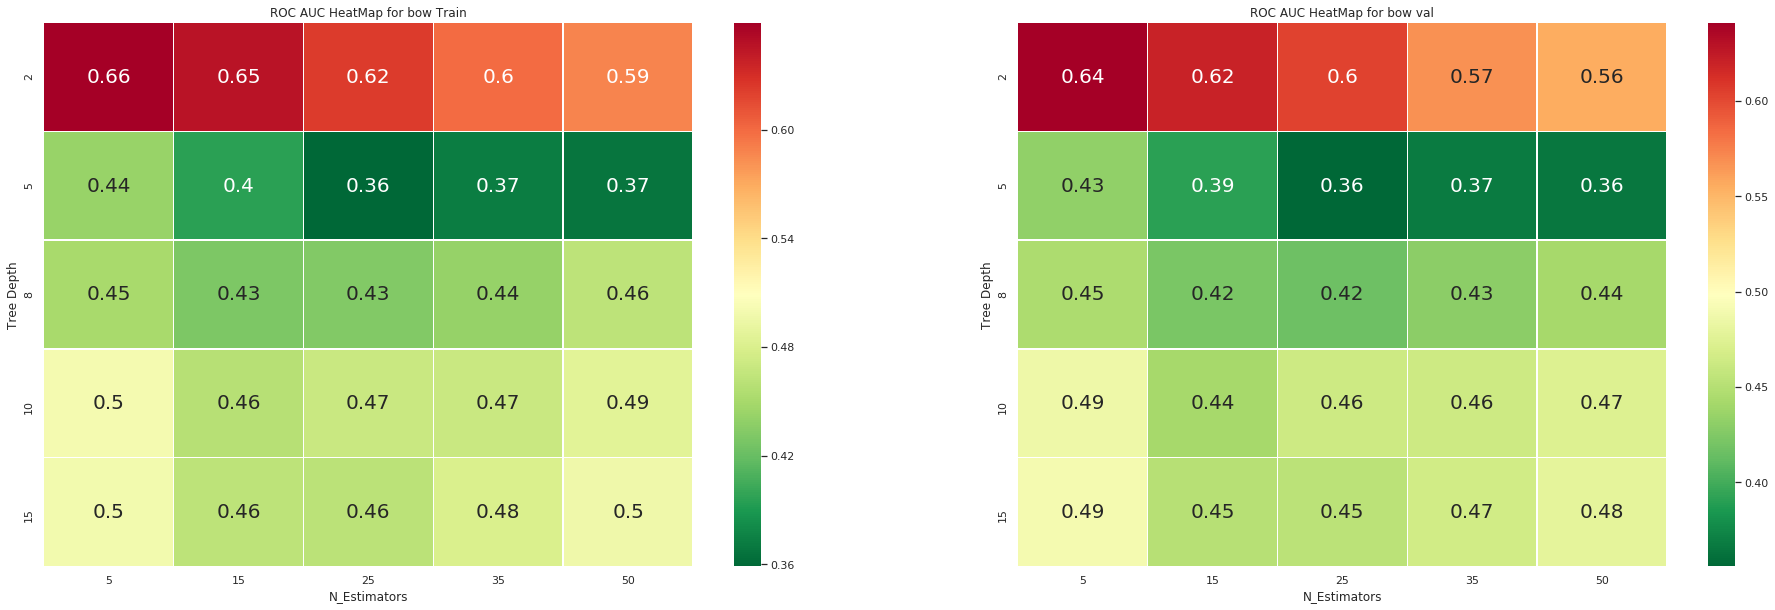

In [159]:
import seaborn as sn
fig, ax = plt.subplots(1, 2, figsize=(32,10))

sn.set(font_scale=1)#for label size
sn.heatmap(sol_train, ax=ax[0], cmap='RdYlGn_r',linewidths=0.5, annot_kws={"size": 20},annot=True)# font size
ax[0].set_xlabel('N_Estimators')
ax[0].set_ylabel('Tree Depth'); 
ax[0].set_title('ROC AUC HeatMap for bow Train'); 

sn.heatmap(sol_val, ax=ax[1], cmap='RdYlGn_r',linewidths=0.5, annot_kws={"size": 20}, annot=True)# font size
ax[1].set_xlabel('N_Estimators')
ax[1].set_ylabel('Tree Depth'); 
ax[1].set_title('ROC AUC HeatMap for bow val');

plt.show()

## Conclusion:
- Best Hyperparameter value for manual search is 'max_depth': 2, 'n_estimators': 5

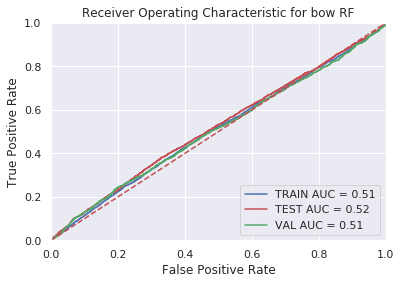

In [160]:
gbdt_bow =XGBClassifier(booster='gbtree',scale_pos_weight=0.1764,objective='binary:logistic',
                                gamma = 0.1,eval_metric='auc',seed=100,max_depth=depth_bow_gbdt,n_estimators=n_est_bow_gbdt)
gbdt_bow=gbdt_bow.fit(x_bow_train,y_train)

y_bow_prob_val = gbdt_bow.predict_proba(x_bow_val.toarray())
y_bow_prob_test = gbdt_bow.predict_proba(x_bow_test.toarray())
y_bow_prob_train = gbdt_bow.predict_proba(x_bow_train.toarray())

fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_bow_prob_train[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)
fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_bow_prob_val[:, 1])
roc_auc_val = auc(fpr_val, tpr_val)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_bow_prob_test[:, 1])
roc_auc_bow_test_gbdt = auc(fpr_test, tpr_test)

plt.title('Receiver Operating Characteristic for bow RF')
plt.plot(fpr_train, tpr_train, 'b', label = 'TRAIN AUC = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'r', label = 'TEST AUC = %0.2f' % roc_auc_bow_test_gbdt)
plt.plot(fpr_val, tpr_val, 'g', label = 'VAL AUC = %0.2f' % roc_auc_val)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Conclusion:
- Model is performing just above the threshold of 0.5

In [161]:
y_pred_bow_test = gbdt_bow.predict(x_bow_test)
y_pred_bow_train = gbdt_bow.predict(x_bow_train)
y_pred_bow_val = gbdt_bow.predict(x_bow_val)

In [162]:
#https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb

confusion_matrix_bow_test = confusion_matrix(y_test, y_pred_bow_test)

TP_test = confusion_matrix_bow_test[1, 1]
TN_test = confusion_matrix_bow_test[0, 0]
FP_test = confusion_matrix_bow_test[0, 1]
FN_test = confusion_matrix_bow_test[1, 0]
TPR_test_bow_gbdt= TP_test / (FN_test + TP_test)
TNR_test_bow_gbdt= TN_test / (TN_test + FP_test)
FPR_test_bow_gbdt= FP_test / (TN_test + FP_test)
FNR_test_bow_gbdt = FN_test / (FN_test+TP_test)

confusion_matrix_bow_train = confusion_matrix(y_train, y_pred_bow_train)
TP_train = confusion_matrix_bow_train[1, 1]
TN_train = confusion_matrix_bow_train[0, 0]
FP_train = confusion_matrix_bow_train[0, 1]
FN_train = confusion_matrix_bow_train[1, 0]
TPR_train= TP_train / (FN_train + TP_train)
TNR_train= TN_train / (TN_train + FP_train)
FPR_train= FP_train / (TN_train + FP_train)
FNR_train = FN_train / (FN_train+TP_train)

confusion_matrix_bow_val = confusion_matrix(y_val, y_pred_bow_val)
TP_val = confusion_matrix_bow_val[1, 1]
TN_val = confusion_matrix_bow_val[0, 0]
FP_val = confusion_matrix_bow_val[0, 1]
FN_val = confusion_matrix_bow_val[1, 0]
TPR_val= TP_val / (FN_val + TP_val)
TNR_val= TN_val / (TN_val + FP_val)
FPR_val= FP_val / (TN_val + FP_val)
FNR_val = FN_val / (FN_val+TP_val)

#from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Data", "TPR","TNR","FPR","FNR"]
x.add_row(["Train",TPR_train,TNR_train,FPR_train,FNR_train])
x.add_row(["Test",TPR_test_bow_gbdt,TNR_test_bow_gbdt,FPR_test_bow_gbdt,FNR_test_bow_gbdt])
x.add_row(["Validation",TPR_val,TNR_val,FPR_val,FNR_val])

print(x)

+------------+--------------------+--------------------+---------------------+---------------------+
|    Data    |        TPR         |        TNR         |         FPR         |         FNR         |
+------------+--------------------+--------------------+---------------------+---------------------+
|   Train    | 0.8106037253952177 | 0.909516765285996  | 0.09048323471400395 | 0.18939627460478226 |
|    Test    | 0.7654631760644419 | 0.5623993558776168 | 0.43760064412238325 |  0.2345368239355581 |
| Validation | 0.7726058364159474 | 0.5756181713628522 |  0.4243818286371478 | 0.22739416358405262 |
+------------+--------------------+--------------------+---------------------+---------------------+


## Conclusion:
- TPR/ TNR are above 0.5 while FPR & FNR are below 0.5.
- Model is performing well for TPR but not for TNR.

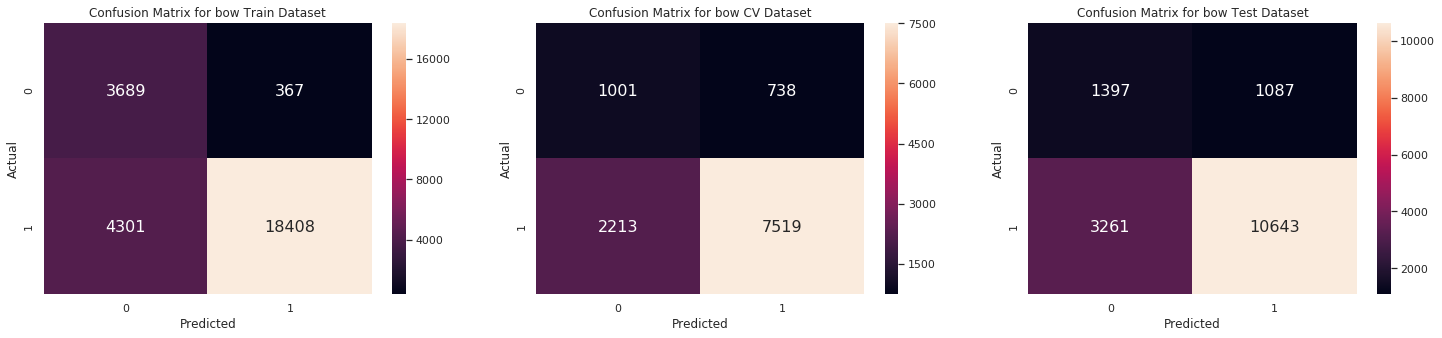

In [163]:
#https://www.kaggle.com/jesucristo/fraud-detection-eda-model-cv#Data
import seaborn as sn
fig, ax = plt.subplots(1, 3, figsize=(25,5))
sn.set(font_scale=1)#for label size

sn.heatmap(confusion_matrix_bow_train,ax=ax[0], annot=True,annot_kws={"size": 16},fmt='g')# font size
ax[0].set_ylabel('Actual')
ax[0].set_xlabel('Predicted'); 
ax[0].set_title('Confusion Matrix for bow Train Dataset'); 
ax[0].xaxis.set_ticklabels(['0','1'])
ax[0].yaxis.set_ticklabels(['0','1']);

sn.heatmap(confusion_matrix_bow_val,ax=ax[1], annot=True,annot_kws={"size": 16},fmt='g')# font size
ax[1].set_ylabel('Actual')
ax[1].set_xlabel('Predicted'); 
ax[1].set_title('Confusion Matrix for bow CV Dataset'); 
ax[1].xaxis.set_ticklabels(['0','1'])
ax[1].yaxis.set_ticklabels(['0','1']);

sn.heatmap(confusion_matrix_bow_test,ax=ax[2], annot=True,annot_kws={"size": 16},fmt='g')# font size
ax[2].set_ylabel('Actual')
ax[2].set_xlabel('Predicted'); 
ax[2].set_title('Confusion Matrix for bow Test Dataset'); 
ax[2].xaxis.set_ticklabels(['0','1'])
ax[2].yaxis.set_ticklabels(['0','1']);

plt.show()

## 2.5.2 GBDT Implementation for TFIDF

In [164]:
start_time = time.time()

#https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
xgb=XGBClassifier(booster='gbtree',scale_pos_weight=1,objective='binary:logistic',gamma = 0.1,eval_metric='auc',seed=100)

gs=GridSearchCV(xgb,grid_parms,verbose=True,scoring = 'roc_auc',n_jobs=-1,refit='AUC', 
                return_train_score=True)
gs_result=gs.fit(x_tfidf_train,y_train.values.reshape(-1,1))

# Summarize results
print("Best: %f using %s" % (gs_result.best_score_, gs_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

depth_tfidf_gbdt = gs_result.best_params_['max_depth']
n_est_tfidf_gbdt = gs_result.best_params_['n_estimators']

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  2.3min finished


Best: 0.732006 using {'max_depth': 5, 'n_estimators': 50}
Execution time: 167.10281348228455 ms


## Conclusion:
- Best Hyperparameter value for Gridsearchcv is 'max_depth': 5, 'n_estimators': 50

In [166]:
grid_parms={'max_depth':depth,'n_estimators':n_est}

sol_train=pd.DataFrame(index=depth, columns=n_est)
for d in tqdm(depth):
    for n in n_est:
        gbdt_tfidf = XGBClassifier(booster='gbtree',scale_pos_weight=1,objective='binary:logistic',
                                gamma = 0.1,eval_metric='auc',seed=100,max_depth=d,n_estimators=n)
        gbdt_tfidf.fit(x_tfidf_train, y_train.values.reshape(-1,1))
        y_tfidf_prob_train = gbdt_tfidf.predict_proba(x_tfidf_train.toarray())
        fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_tfidf_prob_train[:, 1])
        roc_auc_train = auc(fpr_train, tpr_train)
        sol_train.at[d,n] = roc_auc_train

#https://stackoverflow.com/questions/30485986/type-error-in-visualising-pandas-dataframe-as-heatmap
sol_train=sol_train[sol_train.columns].astype(float)

sol_val=pd.DataFrame(index=depth, columns=n_est)
for d in tqdm(depth):
    for n in n_est:
        gbdt_tfidf = XGBClassifier(booster='gbtree',scale_pos_weight=1,objective='binary:logistic',
                                gamma = 0.1,eval_metric='auc',seed=100,max_depth=d,n_estimators=n)
        gbdt_tfidf.fit(x_tfidf_train, y_train.values.reshape(-1,1))
        y_tfidf_prob_val = gbdt_tfidf.predict_proba(x_tfidf_val.toarray())
        fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_tfidf_prob_val[:, 1])
        roc_auc_val = auc(fpr_val, tpr_val)
        sol_val.at[d,n] = roc_auc_val
        
#https://stackoverflow.com/questions/30485986/type-error-in-visualising-pandas-dataframe-as-heatmap
sol_val=sol_val[sol_val.columns].astype(float)

100%|██████████| 5/5 [11:20<00:00, 148.04s/it]


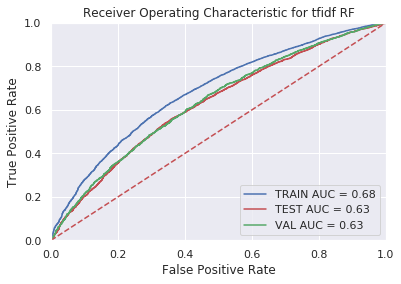

In [167]:
gbdt_tfidf =XGBClassifier(booster='gbtree',scale_pos_weight=0.1764,objective='binary:logistic',
                                gamma = 0.1,eval_metric='auc',seed=100,max_depth=depth_tfidf_gbdt,n_estimators=n_est_tfidf_gbdt)
gbdt_tfidf=gbdt_tfidf.fit(x_tfidf_train,y_train)
y_tfidf_prob_val = gbdt_tfidf.predict_proba(x_tfidf_val.toarray())
y_tfidf_prob_test = gbdt_tfidf.predict_proba(x_tfidf_test.toarray())
y_tfidf_prob_train = gbdt_tfidf.predict_proba(x_tfidf_train.toarray())

fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_tfidf_prob_train[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)
fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_tfidf_prob_val[:, 1])
roc_auc_val = auc(fpr_val, tpr_val)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_tfidf_prob_test[:, 1])
roc_auc_tfidf_test_gbdt = auc(fpr_test, tpr_test)

plt.title('Receiver Operating Characteristic for tfidf RF')
plt.plot(fpr_train, tpr_train, 'b', label = 'TRAIN AUC = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'r', label = 'TEST AUC = %0.2f' % roc_auc_tfidf_test_gbdt)
plt.plot(fpr_val, tpr_val, 'g', label = 'VAL AUC = %0.2f' % roc_auc_val)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Conclusion:
- Test and CV auc values are over 0.5 hence it is a good model.

In [168]:
y_pred_tfidf_test = gbdt_tfidf.predict(x_tfidf_test)
y_pred_tfidf_train = gbdt_tfidf.predict(x_tfidf_train)
y_pred_tfidf_val = gbdt_tfidf.predict(x_tfidf_val)

In [169]:
#https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb
confusion_matrix_tfidf_test = confusion_matrix(y_test, y_pred_tfidf_test)
TP_test = confusion_matrix_tfidf_test[1, 1]
TN_test = confusion_matrix_tfidf_test[0, 0]
FP_test = confusion_matrix_tfidf_test[0, 1]
FN_test = confusion_matrix_tfidf_test[1, 0]
TPR_test_tfidf_gbdt= TP_test / (FN_test + TP_test)
TNR_test_tfidf_gbdt= TN_test / (TN_test + FP_test)
FPR_test_tfidf_gbdt= FP_test / (TN_test + FP_test)
FNR_test_tfidf_gbdt = FN_test / (FN_test+TP_test)

confusion_matrix_tfidf_train = confusion_matrix(y_train, y_pred_tfidf_train)
TP_train = confusion_matrix_tfidf_train[1, 1]
TN_train = confusion_matrix_tfidf_train[0, 0]
FP_train = confusion_matrix_tfidf_train[0, 1]
FN_train = confusion_matrix_tfidf_train[1, 0]
TPR_train= TP_train / (FN_train + TP_train)
TNR_train= TN_train / (TN_train + FP_train)
FPR_train= FP_train / (TN_train + FP_train)
FNR_train = FN_train / (FN_train+TP_train)

confusion_matrix_tfidf_val = confusion_matrix(y_val, y_pred_tfidf_val)
TP_val = confusion_matrix_tfidf_val[1, 1]
TN_val = confusion_matrix_tfidf_val[0, 0]
FP_val = confusion_matrix_tfidf_val[0, 1]
FN_val = confusion_matrix_tfidf_val[1, 0]
TPR_val= TP_val / (FN_val + TP_val)
TNR_val= TN_val / (TN_val + FP_val)
FPR_val= FP_val / (TN_val + FP_val)
FNR_val = FN_val / (FN_val+TP_val)

#from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Data", "TPR","TNR","FPR","FNR"]
x.add_row(["Train",TPR_train,TNR_train,FPR_train,FNR_train])
x.add_row(["Test",TPR_test_tfidf_gbdt,TNR_test_tfidf_gbdt,FPR_test_tfidf_gbdt,FNR_test_tfidf_gbdt])
x.add_row(["Validation",TPR_val,TNR_val,FPR_val,FNR_val])
print(x)

+------------+--------------------+--------------------+---------------------+---------------------+
|    Data    |        TPR         |        TNR         |         FPR         |         FNR         |
+------------+--------------------+--------------------+---------------------+---------------------+
|   Train    | 0.7466202827072966 | 0.7850098619329389 | 0.21499013806706113 |  0.2533797172927033 |
|    Test    | 0.715765247410817  | 0.6179549114331723 |  0.3820450885668277 | 0.28423475258918296 |
| Validation | 0.7267776407727086 | 0.6221966647498562 | 0.37780333525014376 | 0.27322235922729143 |
+------------+--------------------+--------------------+---------------------+---------------------+


## Conclusion:
- TPR & TNR are above 0.7 & 0.6 while FPR & FNR are at 0.38 & 0.28

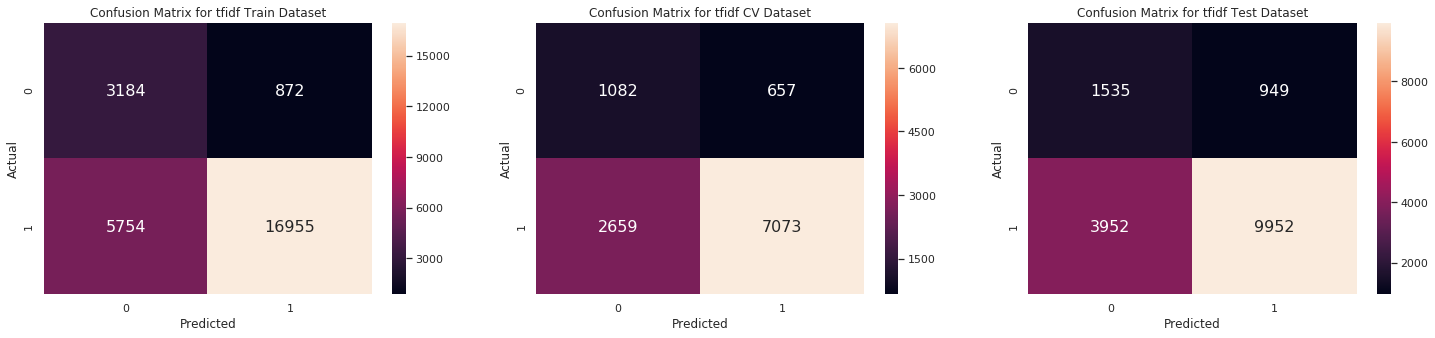

In [170]:
#https://www.kaggle.com/jesucristo/fraud-detection-eda-model-cv#Data
import seaborn as sn
fig, ax = plt.subplots(1, 3, figsize=(25,5))
sn.set(font_scale=1)#for label size

sn.heatmap(confusion_matrix_tfidf_train,ax=ax[0], annot=True,annot_kws={"size": 16},fmt='g')# font size
ax[0].set_ylabel('Actual')
ax[0].set_xlabel('Predicted'); 
ax[0].set_title('Confusion Matrix for tfidf Train Dataset'); 
ax[0].xaxis.set_ticklabels(['0','1'])
ax[0].yaxis.set_ticklabels(['0','1']);

sn.heatmap(confusion_matrix_tfidf_val,ax=ax[1], annot=True,annot_kws={"size": 16},fmt='g')# font size
ax[1].set_ylabel('Actual')
ax[1].set_xlabel('Predicted'); 
ax[1].set_title('Confusion Matrix for tfidf CV Dataset'); 
ax[1].xaxis.set_ticklabels(['0','1'])
ax[1].yaxis.set_ticklabels(['0','1']);

sn.heatmap(confusion_matrix_tfidf_test,ax=ax[2], annot=True,annot_kws={"size": 16},fmt='g')# font size
ax[2].set_ylabel('Actual')
ax[2].set_xlabel('Predicted'); 
ax[2].set_title('Confusion Matrix for tfidf Test Dataset'); 
ax[2].xaxis.set_ticklabels(['0','1'])
ax[2].yaxis.set_ticklabels(['0','1']);

plt.show()

## 2.5.3 GBDT Implementation for Average W2V

In [171]:
start_time = time.time()

#https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
xgb=XGBClassifier(booster='gbtree',scale_pos_weight=1,objective='binary:logistic',gamma = 0.1,eval_metric='auc',seed=100)

gs=GridSearchCV(xgb,grid_parms,verbose=True,scoring = 'roc_auc',n_jobs=-1,refit='AUC', 
                return_train_score=True)
gs_result=gs.fit(x_avgw2v_train,y_train.values.reshape(-1,1))

# Summarize results
print("Best: %f using %s" % (gs_result.best_score_, gs_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

depth_avgw2v_gbdt = gs_result.best_params_['max_depth']
n_est_avgw2v_gbdt = gs_result.best_params_['n_estimators']

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  8.9min finished


Best: 0.727987 using {'max_depth': 5, 'n_estimators': 50}
Execution time: 666.1177370548248 ms


## Conclusion:
- Best Hyperparameter value for Gridsearchcv is 'max_depth': 5, 'n_estimators': 50

In [172]:
sol_train=pd.DataFrame(index=depth, columns=n_est)
for d in tqdm(depth):
    for n in n_est:
        gbdt_avgw2v = XGBClassifier(booster='gbtree',scale_pos_weight=1,objective='binary:logistic',
                                gamma = 0.1,eval_metric='auc',seed=100,max_depth=d,n_estimators=n)
        gbdt_avgw2v.fit(x_avgw2v_train, y_train.values.reshape(-1,1))
        y_avgw2v_prob_train = gbdt_avgw2v.predict_proba(x_avgw2v_train.toarray())
        fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_avgw2v_prob_train[:, 1])
        roc_auc_train = auc(fpr_train, tpr_train)
        sol_train.at[d,n] = roc_auc_train

#https://stackoverflow.com/questions/30485986/type-error-in-visualising-pandas-dataframe-as-heatmap
sol_train=sol_train[sol_train.columns].astype(float)

sol_val=pd.DataFrame(index=depth, columns=n_est)
for d in tqdm(depth):
    for n in n_est:
        gbdt_avgw2v = XGBClassifier(booster='gbtree',scale_pos_weight=1,objective='binary:logistic',
                                gamma = 0.1,eval_metric='auc',seed=100,max_depth=d,n_estimators=n)
        gbdt_avgw2v.fit(x_avgw2v_train, y_train.values.reshape(-1,1))
        y_avgw2v_prob_val = gbdt_avgw2v.predict_proba(x_avgw2v_val.toarray())
        fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_avgw2v_prob_val[:, 1])
        roc_auc_val = auc(fpr_val, tpr_val)
        sol_val.at[d,n] = roc_auc_val
        
#https://stackoverflow.com/questions/30485986/type-error-in-visualising-pandas-dataframe-as-heatmap
sol_val=sol_val[sol_val.columns].astype(float)

100%|██████████| 5/5 [43:44<00:00, 569.86s/it]


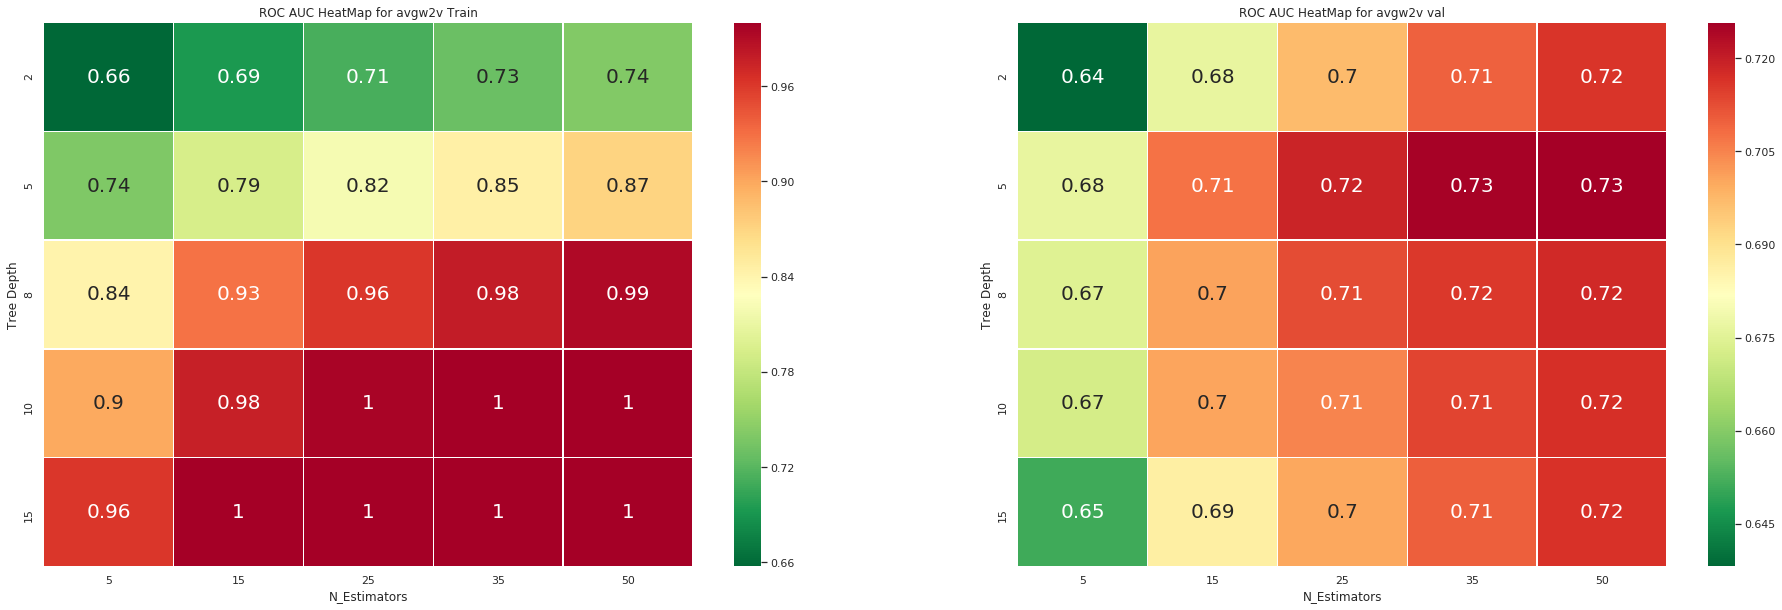

In [173]:
import seaborn as sn
fig, ax = plt.subplots(1, 2, figsize=(32,10))

sn.set(font_scale=1)#for label size
sn.heatmap(sol_train, ax=ax[0], cmap='RdYlGn_r',linewidths=0.5, annot_kws={"size": 20},annot=True)# font size
ax[0].set_xlabel('N_Estimators')
ax[0].set_ylabel('Tree Depth'); 
ax[0].set_title('ROC AUC HeatMap for avgw2v Train'); 

sn.heatmap(sol_val, ax=ax[1], cmap='RdYlGn_r',linewidths=0.5, annot_kws={"size": 20}, annot=True)# font size
ax[1].set_xlabel('N_Estimators')
ax[1].set_ylabel('Tree Depth'); 
ax[1].set_title('ROC AUC HeatMap for avgw2v val');

plt.show()

## Conclusion:
- Best Hyperparameter value for manual method is 'max_depth': 5, 'n_estimators': 35.

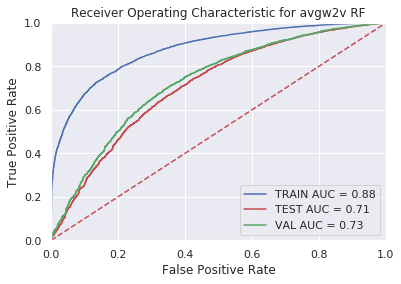

In [174]:
gbdt_avgw2v =XGBClassifier(booster='gbtree',scale_pos_weight=0.1764,objective='binary:logistic',
                                gamma = 0.1,eval_metric='auc',seed=100,max_depth=depth_avgw2v_gbdt,n_estimators=n_est_avgw2v_gbdt)
gbdt_avgw2v=gbdt_avgw2v.fit(x_avgw2v_train,y_train)
y_avgw2v_prob_val = gbdt_avgw2v.predict_proba(x_avgw2v_val.toarray())
y_avgw2v_prob_test = gbdt_avgw2v.predict_proba(x_avgw2v_test.toarray())
y_avgw2v_prob_train = gbdt_avgw2v.predict_proba(x_avgw2v_train.toarray())

fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_avgw2v_prob_train[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)
fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_avgw2v_prob_val[:, 1])
roc_auc_val = auc(fpr_val, tpr_val)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_avgw2v_prob_test[:, 1])
roc_auc_avgw2v_test_gbdt = auc(fpr_test, tpr_test)

plt.title('Receiver Operating Characteristic for avgw2v RF')
plt.plot(fpr_train, tpr_train, 'b', label = 'TRAIN AUC = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'r', label = 'TEST AUC = %0.2f' % roc_auc_avgw2v_test_gbdt)
plt.plot(fpr_val, tpr_val, 'g', label = 'VAL AUC = %0.2f' % roc_auc_val)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Conclusion:
- Model is performing well with both Test and CV auc values over 0.71.

In [175]:
y_pred_avgw2v_test = gbdt_avgw2v.predict(x_avgw2v_test)
y_pred_avgw2v_train = gbdt_avgw2v.predict(x_avgw2v_train)
y_pred_avgw2v_val = gbdt_avgw2v.predict(x_avgw2v_val)

In [176]:
#https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb
confusion_matrix_avgw2v_test = confusion_matrix(y_test, y_pred_avgw2v_test)
TP_test = confusion_matrix_avgw2v_test[1, 1]
TN_test = confusion_matrix_avgw2v_test[0, 0]
FP_test = confusion_matrix_avgw2v_test[0, 1]
FN_test = confusion_matrix_avgw2v_test[1, 0]
TPR_test_avgw2v_gbdt= TP_test / (FN_test + TP_test)
TNR_test_avgw2v_gbdt= TN_test / (TN_test + FP_test)
FPR_test_avgw2v_gbdt= FP_test / (TN_test + FP_test)
FNR_test_avgw2v_gbdt = FN_test / (FN_test+TP_test)

confusion_matrix_avgw2v_train = confusion_matrix(y_train, y_pred_avgw2v_train)
TP_train = confusion_matrix_avgw2v_train[1, 1]
TN_train = confusion_matrix_avgw2v_train[0, 0]
FP_train = confusion_matrix_avgw2v_train[0, 1]
FN_train = confusion_matrix_avgw2v_train[1, 0]
TPR_train= TP_train / (FN_train + TP_train)
TNR_train= TN_train / (TN_train + FP_train)
FPR_train= FP_train / (TN_train + FP_train)
FNR_train = FN_train / (FN_train+TP_train)

confusion_matrix_avgw2v_val = confusion_matrix(y_val, y_pred_avgw2v_val)
TP_val = confusion_matrix_avgw2v_val[1, 1]
TN_val = confusion_matrix_avgw2v_val[0, 0]
FP_val = confusion_matrix_avgw2v_val[0, 1]
FN_val = confusion_matrix_avgw2v_val[1, 0]
TPR_val= TP_val / (FN_val + TP_val)
TNR_val= TN_val / (TN_val + FP_val)
FPR_val= FP_val / (TN_val + FP_val)
FNR_val = FN_val / (FN_val+TP_val)

#from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Data", "TPR","TNR","FPR","FNR"]
x.add_row(["Train",TPR_train,TNR_train,FPR_train,FNR_train])
x.add_row(["Test",TPR_test_avgw2v_gbdt,TNR_test_avgw2v_gbdt,FPR_test_avgw2v_gbdt,FNR_test_avgw2v_gbdt])
x.add_row(["Validation",TPR_val,TNR_val,FPR_val,FNR_val])
print(x)

+------------+--------------------+--------------------+---------------------+---------------------+
|    Data    |        TPR         |        TNR         |         FPR         |         FNR         |
+------------+--------------------+--------------------+---------------------+---------------------+
|   Train    | 0.7775771720463253 | 0.8064595660749507 |  0.1935404339250493 | 0.22242282795367477 |
|    Test    | 0.7365506329113924 | 0.5801127214170693 | 0.41988727858293073 |  0.2634493670886076 |
| Validation | 0.7479449239621866 | 0.6020701552616446 | 0.39792984473835535 |  0.2520550760378134 |
+------------+--------------------+--------------------+---------------------+---------------------+


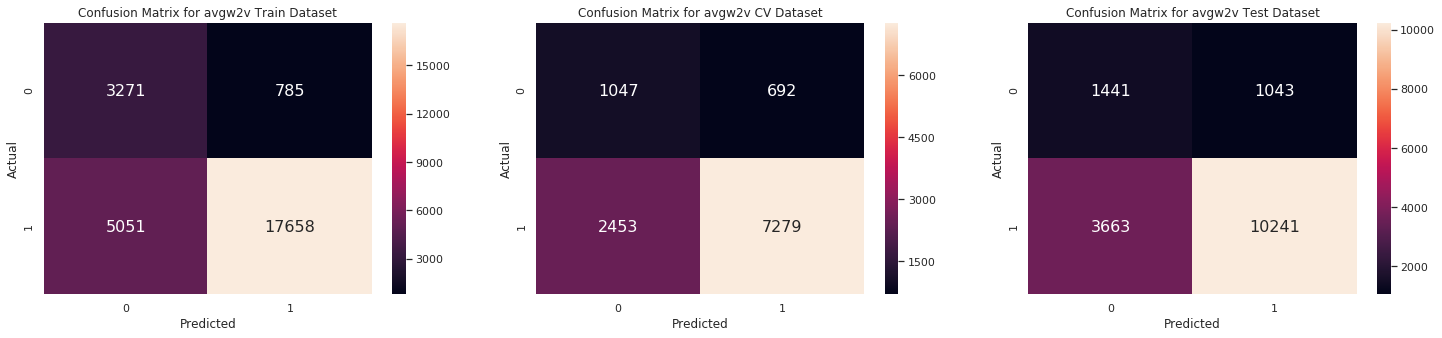

In [177]:
#https://www.kaggle.com/jesucristo/fraud-detection-eda-model-cv#Data
import seaborn as sn
fig, ax = plt.subplots(1, 3, figsize=(25,5))
sn.set(font_scale=1)#for label size

sn.heatmap(confusion_matrix_avgw2v_train,ax=ax[0], annot=True,annot_kws={"size": 16},fmt='g')# font size
ax[0].set_ylabel('Actual')
ax[0].set_xlabel('Predicted'); 
ax[0].set_title('Confusion Matrix for avgw2v Train Dataset'); 
ax[0].xaxis.set_ticklabels(['0','1'])
ax[0].yaxis.set_ticklabels(['0','1']);

sn.heatmap(confusion_matrix_avgw2v_val,ax=ax[1], annot=True,annot_kws={"size": 16},fmt='g')# font size
ax[1].set_ylabel('Actual')
ax[1].set_xlabel('Predicted'); 
ax[1].set_title('Confusion Matrix for avgw2v CV Dataset'); 
ax[1].xaxis.set_ticklabels(['0','1'])
ax[1].yaxis.set_ticklabels(['0','1']);

sn.heatmap(confusion_matrix_avgw2v_test,ax=ax[2], annot=True,annot_kws={"size": 16},fmt='g')# font size
ax[2].set_ylabel('Actual')
ax[2].set_xlabel('Predicted'); 
ax[2].set_title('Confusion Matrix for avgw2v Test Dataset'); 
ax[2].xaxis.set_ticklabels(['0','1'])
ax[2].yaxis.set_ticklabels(['0','1']);

plt.show()

## 2.5.4 GBDT Implementation for TFIDF W2V

In [178]:
start_time = time.time()

#https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
xgb=XGBClassifier(booster='gbtree',scale_pos_weight=1,objective='binary:logistic',gamma = 0.1,eval_metric='auc',seed=100)

gs=GridSearchCV(xgb,grid_parms,verbose=True,scoring = 'roc_auc',n_jobs=-1,refit='AUC', 
                return_train_score=True)
gs_result=gs.fit(x_tfidfw2v_train,y_train.values.reshape(-1,1))

# Summarize results
print("Best: %f using %s" % (gs_result.best_score_, gs_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

depth_tfidfw2v_gbdt = gs_result.best_params_['max_depth']
n_est_tfidfw2v_gbdt = gs_result.best_params_['n_estimators']

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  8.9min finished


Best: 0.729425 using {'max_depth': 5, 'n_estimators': 50}
Execution time: 656.3305690288544 ms


## Conclusion:
- Best Hyperparameter value for Gridsearchcv is 'max_depth': 5, 'n_estimators': 50

In [179]:
sol_train=pd.DataFrame(index=depth, columns=n_est)
for d in tqdm(depth):
    for n in n_est:
        gbdt_tfidfw2v = XGBClassifier(booster='gbtree',scale_pos_weight=1,objective='binary:logistic',
                                gamma = 0.1,eval_metric='auc',seed=100,max_depth=d,n_estimators=n)
        gbdt_tfidfw2v.fit(x_tfidfw2v_train, y_train.values.reshape(-1,1))
        y_tfidfw2v_prob_train = gbdt_tfidfw2v.predict_proba(x_tfidfw2v_train.toarray())
        fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_tfidfw2v_prob_train[:, 1])
        roc_auc_train = auc(fpr_train, tpr_train)
        sol_train.at[d,n] = roc_auc_train

#https://stackoverflow.com/questions/30485986/type-error-in-visualising-pandas-dataframe-as-heatmap
sol_train=sol_train[sol_train.columns].astype(float)

sol_val=pd.DataFrame(index=depth, columns=n_est)
for d in tqdm(depth):
    for n in n_est:
        gbdt_tfidfw2v = XGBClassifier(booster='gbtree',scale_pos_weight=1,objective='binary:logistic',
                                gamma = 0.1,eval_metric='auc',seed=100,max_depth=d,n_estimators=n)
        gbdt_tfidfw2v.fit(x_tfidfw2v_train, y_train.values.reshape(-1,1))
        y_tfidfw2v_prob_val = gbdt_tfidfw2v.predict_proba(x_tfidfw2v_val.toarray())
        fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_tfidfw2v_prob_val[:, 1])
        roc_auc_val = auc(fpr_val, tpr_val)
        sol_val.at[d,n] = roc_auc_val
        
#https://stackoverflow.com/questions/30485986/type-error-in-visualising-pandas-dataframe-as-heatmap
sol_val=sol_val[sol_val.columns].astype(float)

100%|██████████| 5/5 [42:58<00:00, 560.77s/it]


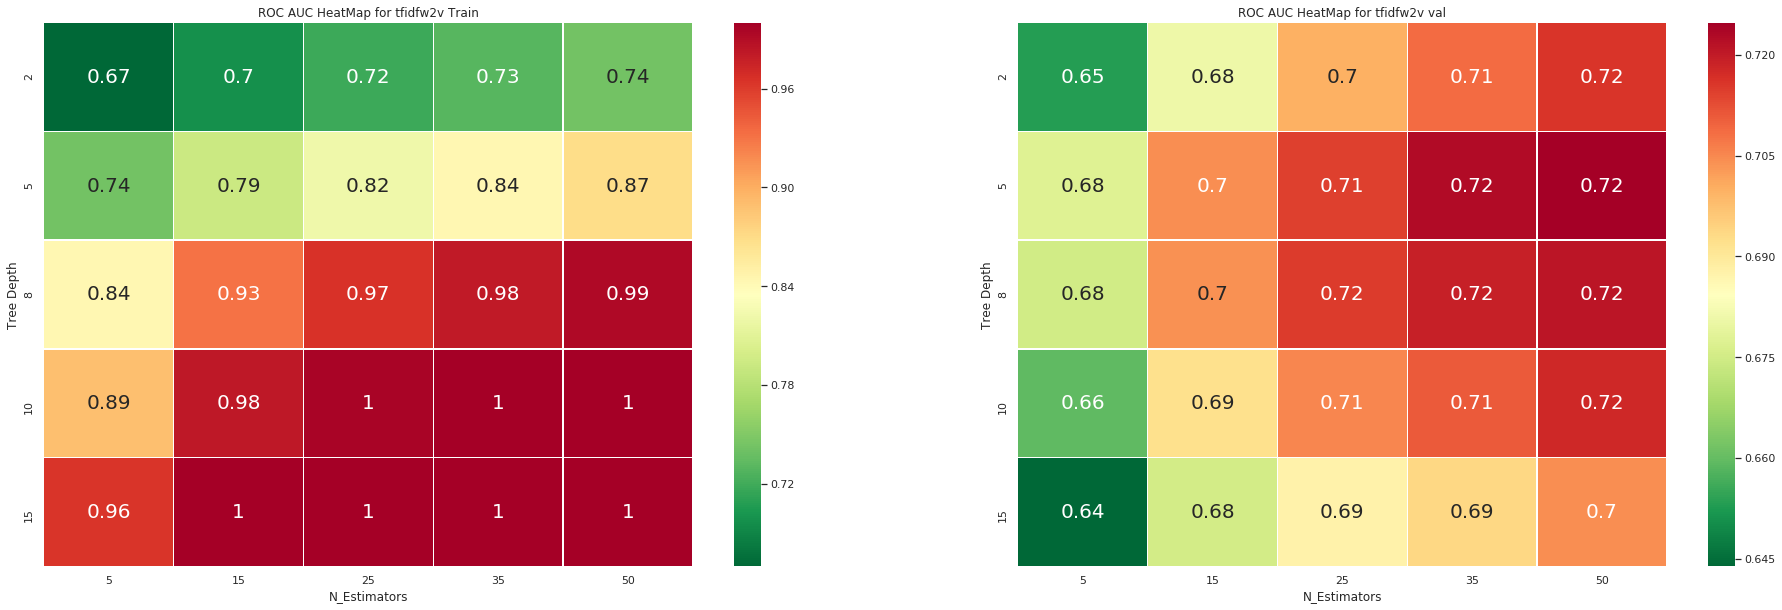

In [180]:
import seaborn as sn
fig, ax = plt.subplots(1, 2, figsize=(32,10))

sn.set(font_scale=1)#for label size
sn.heatmap(sol_train, ax=ax[0], cmap='RdYlGn_r',linewidths=0.5, annot_kws={"size": 20},annot=True)# font size
ax[0].set_xlabel('N_Estimators')
ax[0].set_ylabel('Tree Depth'); 
ax[0].set_title('ROC AUC HeatMap for tfidfw2v Train'); 

sn.heatmap(sol_val, ax=ax[1], cmap='RdYlGn_r',linewidths=0.5, annot_kws={"size": 20}, annot=True)# font size
ax[1].set_xlabel('N_Estimators')
ax[1].set_ylabel('Tree Depth'); 
ax[1].set_title('ROC AUC HeatMap for tfidfw2v val');

plt.show()

## Conclusion:
- Best Hyperparameter value for manual method is 'max_depth': 5, 'n_estimators': 35.

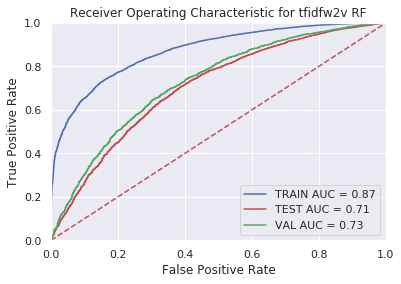

In [181]:
gbdt_tfidfw2v =XGBClassifier(booster='gbtree',scale_pos_weight=0.1764,objective='binary:logistic',
                                gamma = 0.1,eval_metric='auc',seed=100,max_depth=depth_tfidfw2v_gbdt,n_estimators=n_est_tfidfw2v_gbdt)
gbdt_tfidfw2v=gbdt_tfidfw2v.fit(x_tfidfw2v_train,y_train)
y_tfidfw2v_prob_val = gbdt_tfidfw2v.predict_proba(x_tfidfw2v_val.toarray())
y_tfidfw2v_prob_test = gbdt_tfidfw2v.predict_proba(x_tfidfw2v_test.toarray())
y_tfidfw2v_prob_train = gbdt_tfidfw2v.predict_proba(x_tfidfw2v_train.toarray())

fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_tfidfw2v_prob_train[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)
fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_tfidfw2v_prob_val[:, 1])
roc_auc_val = auc(fpr_val, tpr_val)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_tfidfw2v_prob_test[:, 1])
roc_auc_tfidfw2v_test_gbdt = auc(fpr_test, tpr_test)

plt.title('Receiver Operating Characteristic for tfidfw2v RF')
plt.plot(fpr_train, tpr_train, 'b', label = 'TRAIN AUC = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'r', label = 'TEST AUC = %0.2f' % roc_auc_tfidfw2v_test_gbdt)
plt.plot(fpr_val, tpr_val, 'g', label = 'VAL AUC = %0.2f' % roc_auc_val)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Conclusion:
- Model is performing well with both Test and CV values over 0.71

In [182]:
y_pred_tfidfw2v_test = gbdt_tfidfw2v.predict(x_tfidfw2v_test)
y_pred_tfidfw2v_train = gbdt_tfidfw2v.predict(x_tfidfw2v_train)
y_pred_tfidfw2v_val = gbdt_tfidfw2v.predict(x_tfidfw2v_val)

In [183]:
#https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb
confusion_matrix_tfidfw2v_test = confusion_matrix(y_test, y_pred_tfidfw2v_test)
TP_test = confusion_matrix_tfidfw2v_test[1, 1]
TN_test = confusion_matrix_tfidfw2v_test[0, 0]
FP_test = confusion_matrix_tfidfw2v_test[0, 1]
FN_test = confusion_matrix_tfidfw2v_test[1, 0]
TPR_test_tfidfw2v_gbdt= TP_test / (FN_test + TP_test)
TNR_test_tfidfw2v_gbdt= TN_test / (TN_test + FP_test)
FPR_test_tfidfw2v_gbdt= FP_test / (TN_test + FP_test)
FNR_test_tfidfw2v_gbdt = FN_test / (FN_test+TP_test)

confusion_matrix_tfidfw2v_train = confusion_matrix(y_train, y_pred_tfidfw2v_train)
TP_train = confusion_matrix_tfidfw2v_train[1, 1]
TN_train = confusion_matrix_tfidfw2v_train[0, 0]
FP_train = confusion_matrix_tfidfw2v_train[0, 1]
FN_train = confusion_matrix_tfidfw2v_train[1, 0]
TPR_train= TP_train / (FN_train + TP_train)
TNR_train= TN_train / (TN_train + FP_train)
FPR_train= FP_train / (TN_train + FP_train)
FNR_train = FN_train / (FN_train+TP_train)

confusion_matrix_tfidfw2v_val = confusion_matrix(y_val, y_pred_tfidfw2v_val)
TP_val = confusion_matrix_tfidfw2v_val[1, 1]
TN_val = confusion_matrix_tfidfw2v_val[0, 0]
FP_val = confusion_matrix_tfidfw2v_val[0, 1]
FN_val = confusion_matrix_tfidfw2v_val[1, 0]
TPR_val= TP_val / (FN_val + TP_val)
TNR_val= TN_val / (TN_val + FP_val)
FPR_val= FP_val / (TN_val + FP_val)
FNR_val = FN_val / (FN_val+TP_val)

#from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Data", "TPR","TNR","FPR","FNR"]
x.add_row(["Train",TPR_train,TNR_train,FPR_train,FNR_train])
x.add_row(["Test",TPR_test_tfidfw2v_gbdt,TNR_test_tfidfw2v_gbdt,FPR_test_tfidfw2v_gbdt,FNR_test_tfidfw2v_gbdt])
x.add_row(["Validation",TPR_val,TNR_val,FPR_val,FNR_val])
print(x)

+------------+--------------------+--------------------+---------------------+---------------------+
|    Data    |        TPR         |        TNR         |         FPR         |         FNR         |
+------------+--------------------+--------------------+---------------------+---------------------+
|   Train    | 0.7647628693469549 | 0.8091715976331361 |  0.1908284023668639 | 0.23523713065304505 |
|    Test    | 0.7191455696202531 | 0.5970209339774557 |  0.4029790660225443 | 0.28085443037974683 |
| Validation | 0.7252363337443486 | 0.6101207590569293 | 0.38987924094307075 | 0.27476366625565146 |
+------------+--------------------+--------------------+---------------------+---------------------+


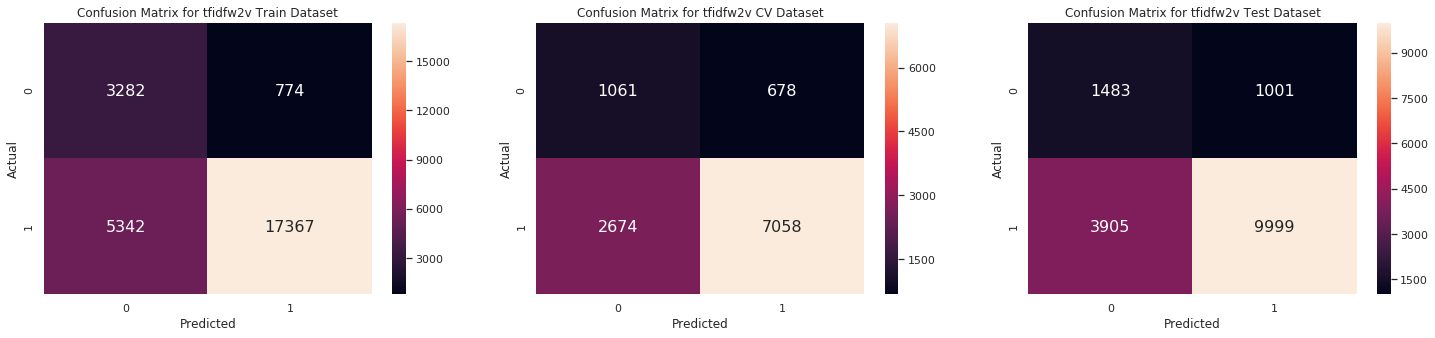

In [184]:
#https://www.kaggle.com/jesucristo/fraud-detection-eda-model-cv#Data
import seaborn as sn
fig, ax = plt.subplots(1, 3, figsize=(25,5))
sn.set(font_scale=1)#for label size

sn.heatmap(confusion_matrix_tfidfw2v_train,ax=ax[0], annot=True,annot_kws={"size": 16},fmt='g')# font size
ax[0].set_ylabel('Actual')
ax[0].set_xlabel('Predicted'); 
ax[0].set_title('Confusion Matrix for tfidfw2v Train Dataset'); 
ax[0].xaxis.set_ticklabels(['0','1'])
ax[0].yaxis.set_ticklabels(['0','1']);

sn.heatmap(confusion_matrix_tfidfw2v_val,ax=ax[1], annot=True,annot_kws={"size": 16},fmt='g')# font size
ax[1].set_ylabel('Actual')
ax[1].set_xlabel('Predicted'); 
ax[1].set_title('Confusion Matrix for tfidfw2v CV Dataset'); 
ax[1].xaxis.set_ticklabels(['0','1'])
ax[1].yaxis.set_ticklabels(['0','1']);

sn.heatmap(confusion_matrix_tfidfw2v_test,ax=ax[2], annot=True,annot_kws={"size": 16},fmt='g')# font size
ax[2].set_ylabel('Actual')
ax[2].set_xlabel('Predicted'); 
ax[2].set_title('Confusion Matrix for tfidfw2v Test Dataset'); 
ax[2].xaxis.set_ticklabels(['0','1'])
ax[2].yaxis.set_ticklabels(['0','1']);

plt.show()

<h1>3. Conclusions</h1>

In [186]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Vectorizor", "Penalty","Hyper Parameter","AUC"]
x.add_row(["BOW USING RF",depth_bow,n_est_bow ,roc_auc_bow_test])
x.add_row(["TF-IDF USING RF",depth_tfidf,n_est_tfidf ,roc_auc_tfidf_test])
x.add_row(["Average W2V USING RF",depth_avgw2v,n_est_avgw2v,roc_auc_avgw2v_test])
x.add_row(["TF-IDF W2V USING RF",depth_tfidfw2v,n_est_tfidfw2v,roc_auc_tfidfw2v_test])
x.add_row(["BOW USING GBDT",depth_bow_gbdt,n_est_bow_gbdt,roc_auc_bow_test_gbdt])
x.add_row(["TF-IDF USING GBDT",depth_tfidf_gbdt,n_est_tfidf_gbdt,roc_auc_tfidf_test_gbdt])
x.add_row(["Average W2V USING GBDT",depth_avgw2v_gbdt,n_est_avgw2v_gbdt,roc_auc_avgw2v_test_gbdt])
x.add_row(["TF-IDF W2V USING GBDT",depth_tfidfw2v_gbdt,n_est_tfidfw2v_gbdt ,roc_auc_tfidfw2v_test_gbdt])
print(x)

+------------------------+---------+-----------------+--------------------+
|       Vectorizor       | Penalty | Hyper Parameter |        AUC         |
+------------------------+---------+-----------------+--------------------+
|      BOW USING RF      |    15   |        50       | 0.6957906030123283 |
|    TF-IDF USING RF     |    10   |        50       | 0.6792890494562206 |
|  Average W2V USING RF  |    5    |        50       | 0.6875423018017268 |
|  TF-IDF W2V USING RF   |    5    |        35       | 0.6764844486879433 |
|     BOW USING GBDT     |    8    |        50       | 0.5214043207946276 |
|   TF-IDF USING GBDT    |    5    |        50       | 0.6283633117313291 |
| Average W2V USING GBDT |    5    |        50       | 0.7105393824272814 |
| TF-IDF W2V USING GBDT  |    5    |        50       | 0.705070318276324  |
+------------------------+---------+-----------------+--------------------+


### Conclusion
 - Best model is Avergae W2V using GBDT with hyperparameter of 5,50 and auc of 0.71